# Bank Marketing 
### Main Problem (classifciation): Predict if the client will subscribe (yes / no) a term deposit 

# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [2]:
data = pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Statistical Summary of Data

In [3]:
data.describe().T.style.background_gradient(cmap = 'coolwarm')

,count,mean,std,min,25%,50%,75%,max
age,11162.000000,41.231948,11.913369,18.000000,32.000000,39.000000,49.000000,95.000000
balance,11162.000000,1528.538524,3225.413326,-6847.000000,122.000000,550.000000,1708.000000,81204.000000
day,11162.000000,15.658036,8.420740,1.000000,8.000000,15.000000,22.000000,31.000000
duration,11162.000000,371.993818,347.128386,2.000000,138.000000,255.000000,496.000000,3881.000000
campaign,11162.000000,2.508421,2.722077,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,11162.000000,51.330407,108.758282,-1.000000,-1.000000,-1.000000,20.750000,854.000000
previous,11162.000000,0.832557,2.292007,0.000000,0.000000,0.000000,1.000000,58.000000


## Data Types and NULL

### Data Types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### NULL Info

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Exploratory Data Analysis (EDA)

## Relationship between Features and Target

### Deposit -> Target

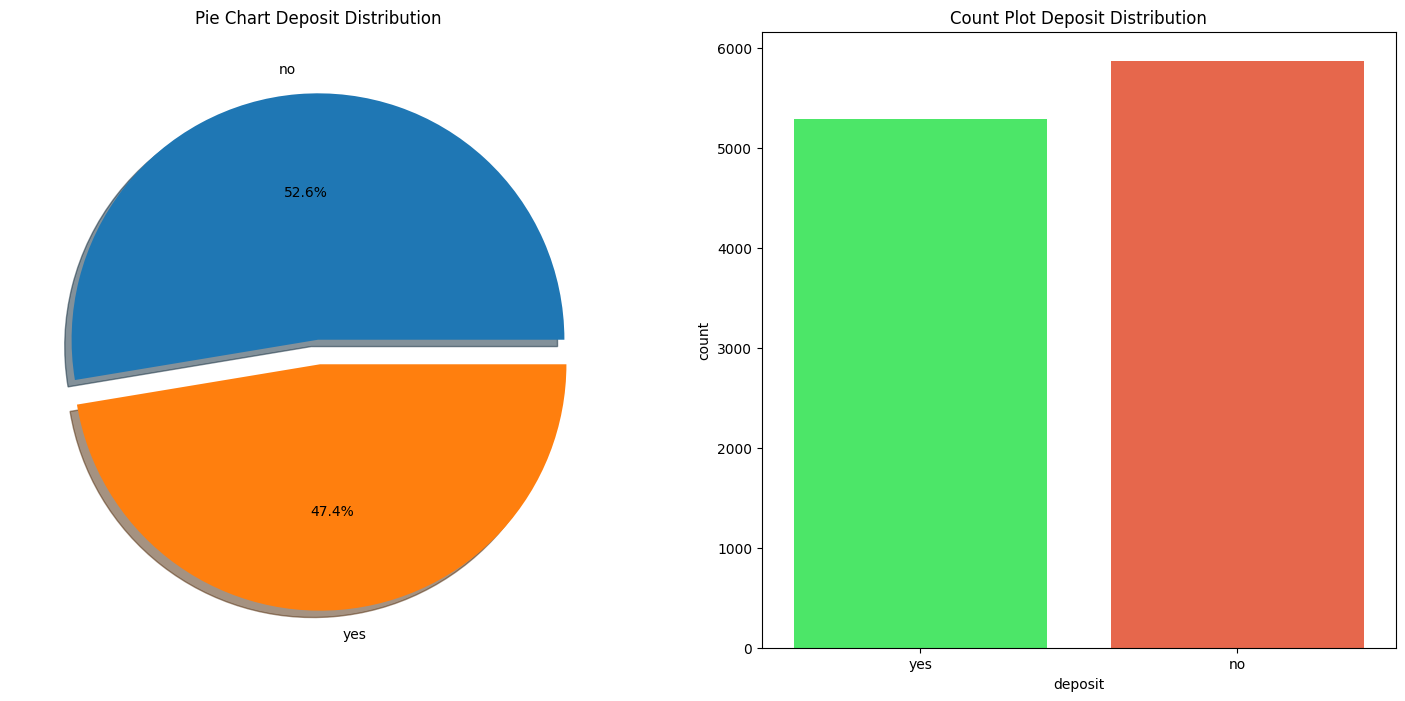

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data['deposit'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0, 0.1], shadow = True)
ax[0].set_title('Pie Chart Deposit Distribution')
ax[0].set_ylabel('')

ax[1].set_title('Count Plot Deposit Distribution')
swapped_palette = ["#33FF57", "#FF5733"]
sns.countplot(data=data, x='deposit', hue='deposit', palette=swapped_palette, ax=ax[1])
plt.show()

### Age

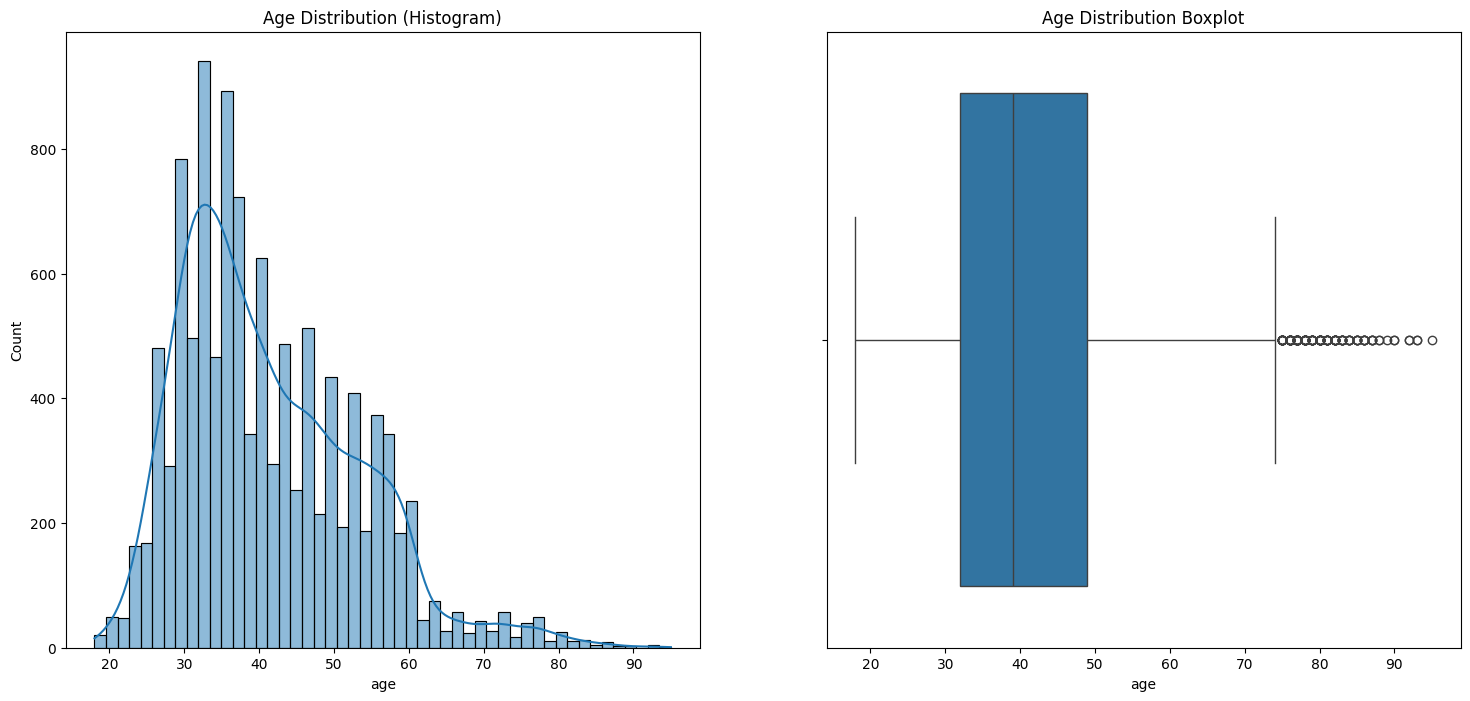

In [7]:
fig, ax = plt.subplots(1,2, figsize=(18, 8))
sns.histplot(data = data, x = 'age',  kde = True, bins = 50, ax = ax[0])
sns.boxplot(data = data, x = 'age')
ax[0].set_title('Age Distribution (Histogram)')
ax[1].set_title('Age Distribution Boxplot')
plt.show()

From the graph, we can see that age perform a right - skewed distribution as there is still an outlier on the age based on the boxplot

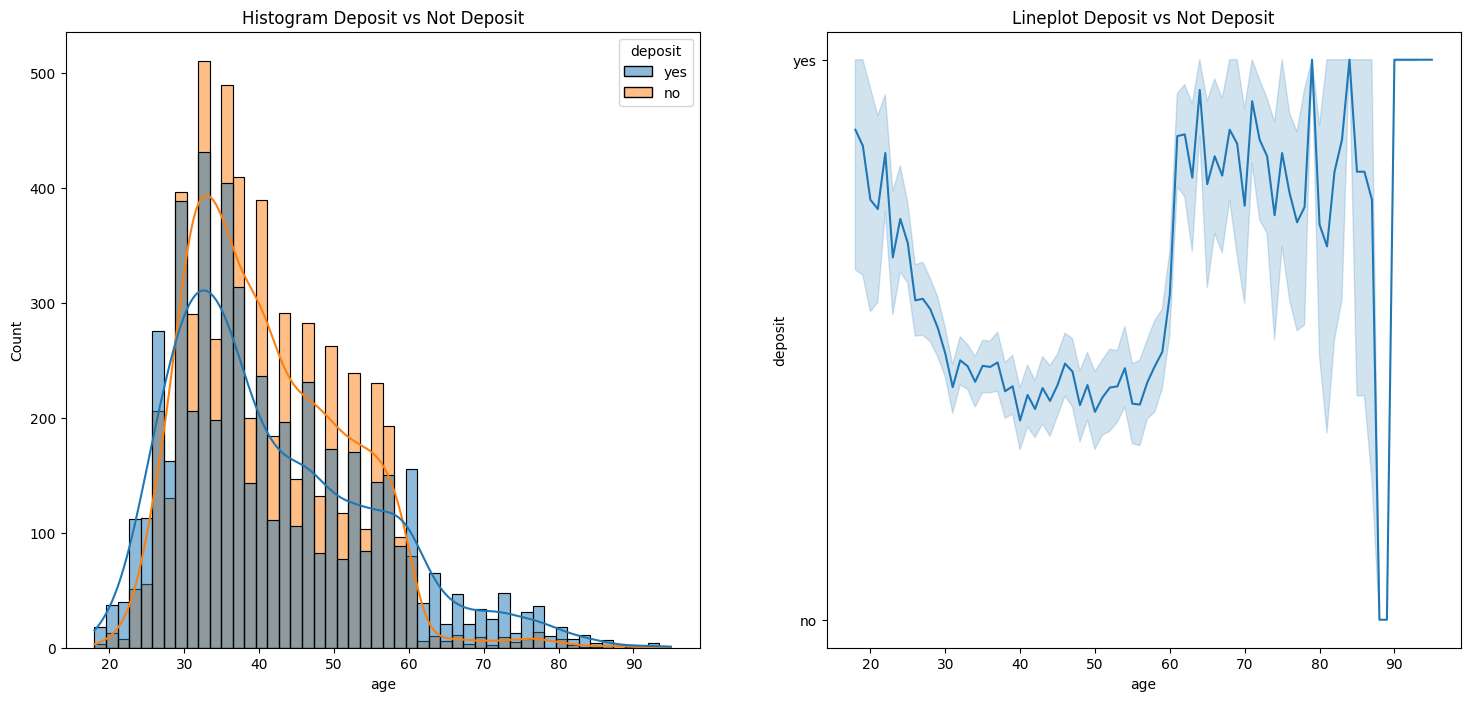

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'age', ax = ax [0], bins = 50, kde = True, hue = 'deposit')
sns.lineplot(data = data, x = 'age', y = 'deposit')
ax[0].set_title('Histogram Deposit vs Not Deposit')
ax[1].set_title('Lineplot Deposit vs Not Deposit')
plt.show()

Based on the greaph, we can see that at around age 30 - 60, more peoplde decide not to deposit while people < age 30 and people > age 60 decide to deposit

### Job -> Type of job

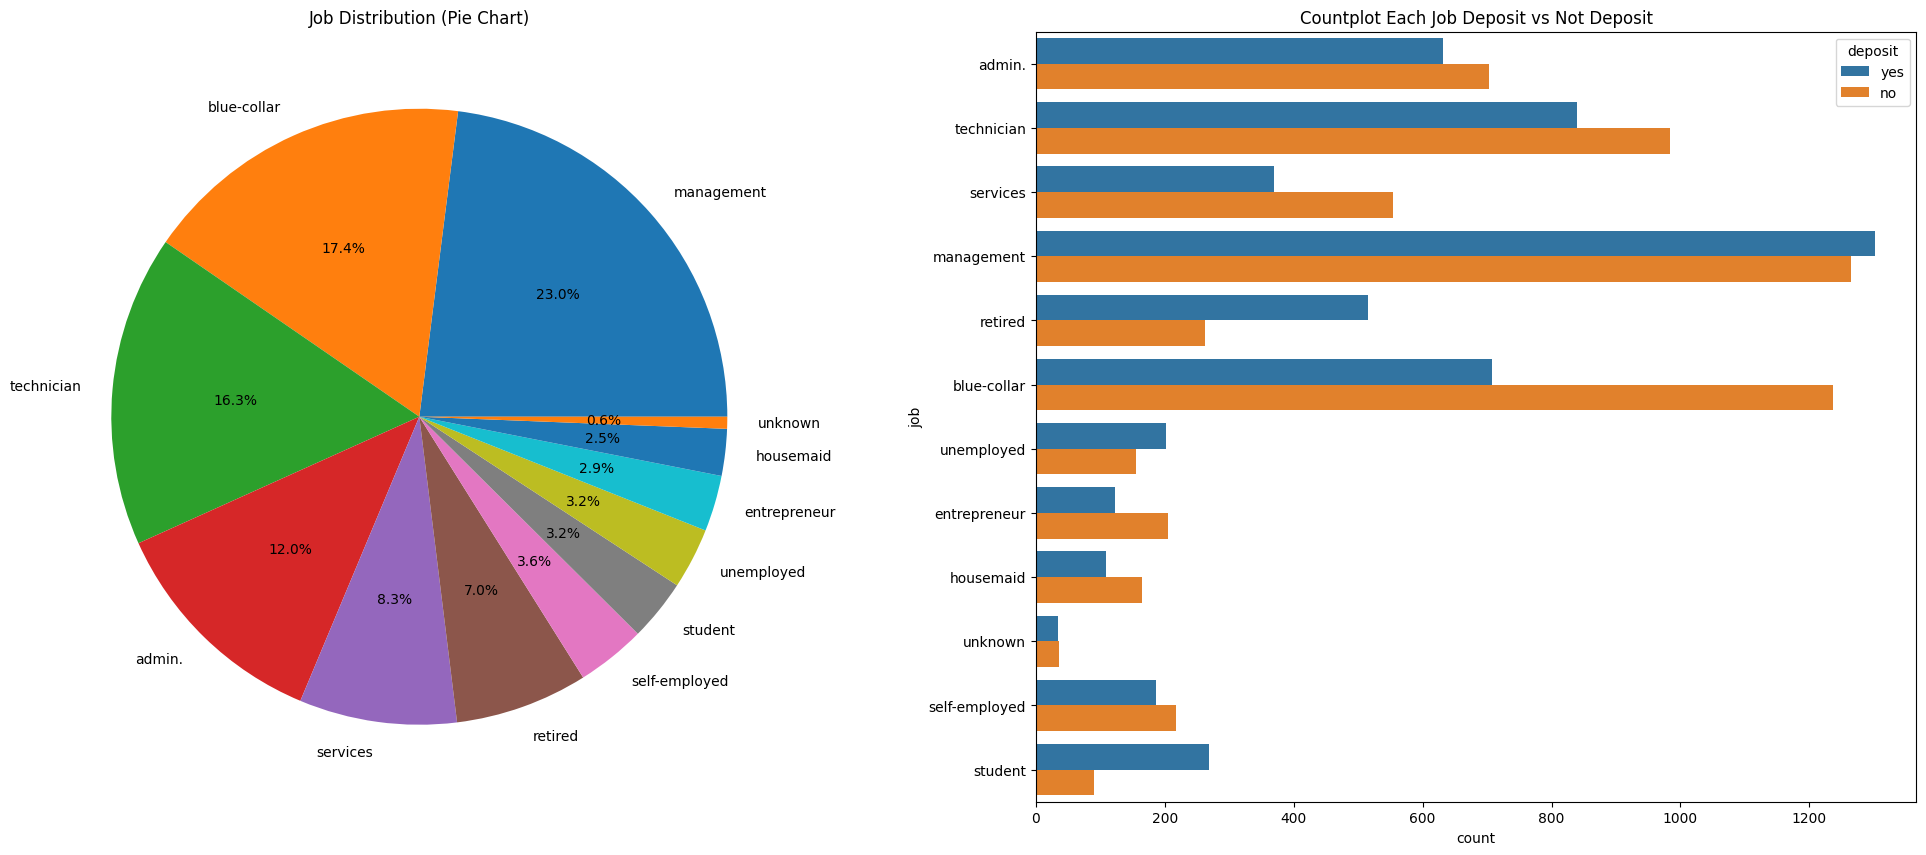

In [9]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))
data['job'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%')
ax[0].set_ylabel('')
ax[0].set_title('Job Distribution (Pie Chart)')
sns.countplot(data = data, y = 'job', hue = 'deposit')
ax[1].set_title('Countplot Each Job Deposit vs Not Deposit')
plt.show()

Based on the graph, we can see that most type of jobs mostly prefer not to deposit where we can see that the distribution of deposit and not deposit, not deposit is more dominant

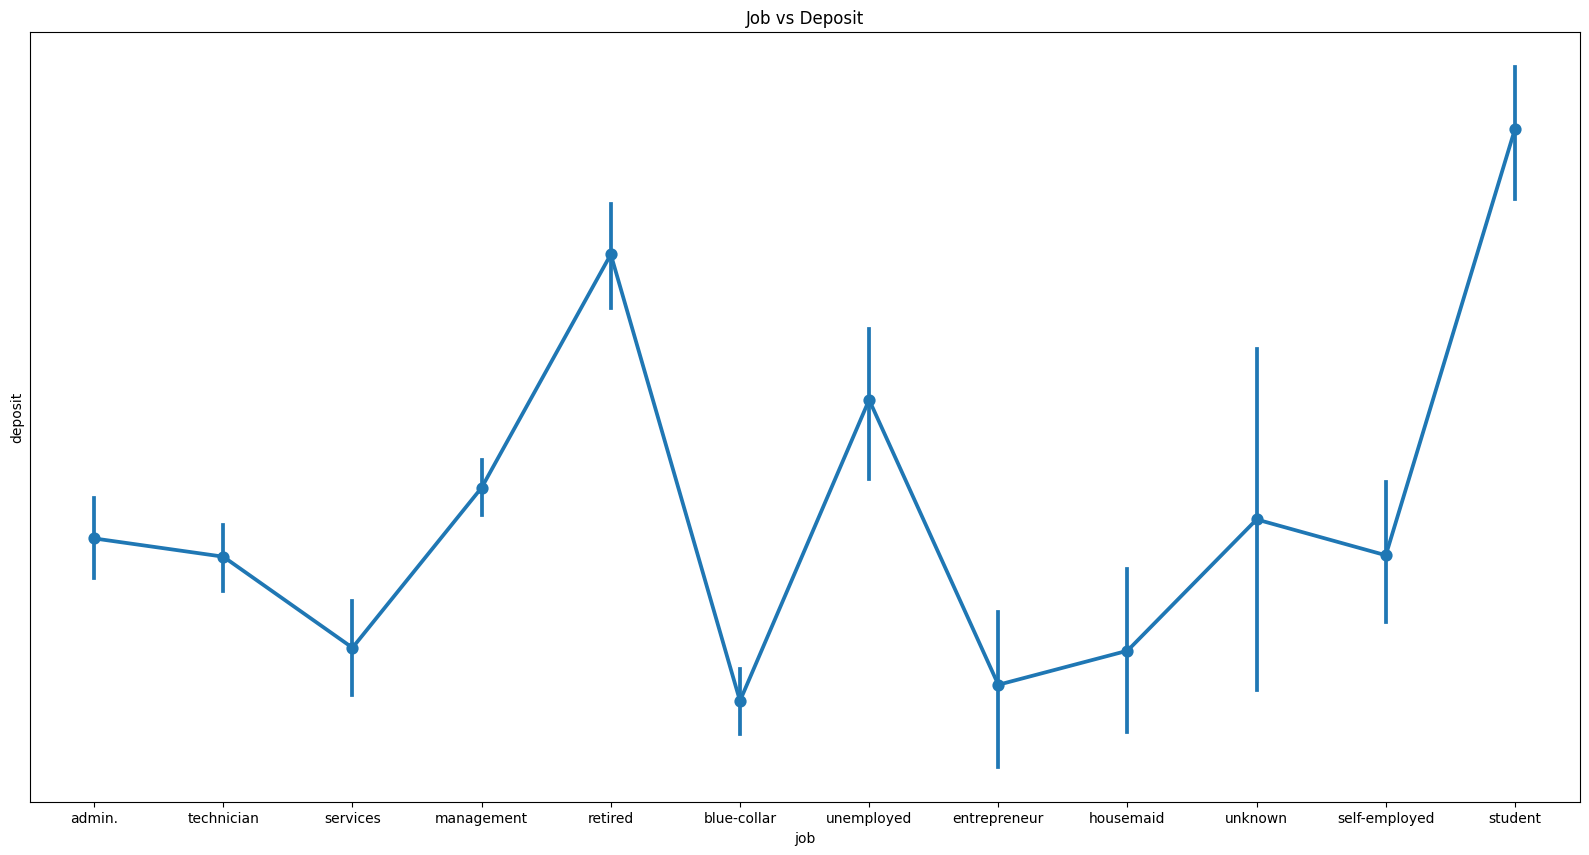

In [10]:
plt.figure(figsize = (20, 10))
plt.title('Job vs Deposit')
sns.pointplot(data = data, x = 'job', y = 'deposit')
plt.show()

As for job types, Student place at top to deposit followed by retired, unemployed and management that has higher chance to deposit

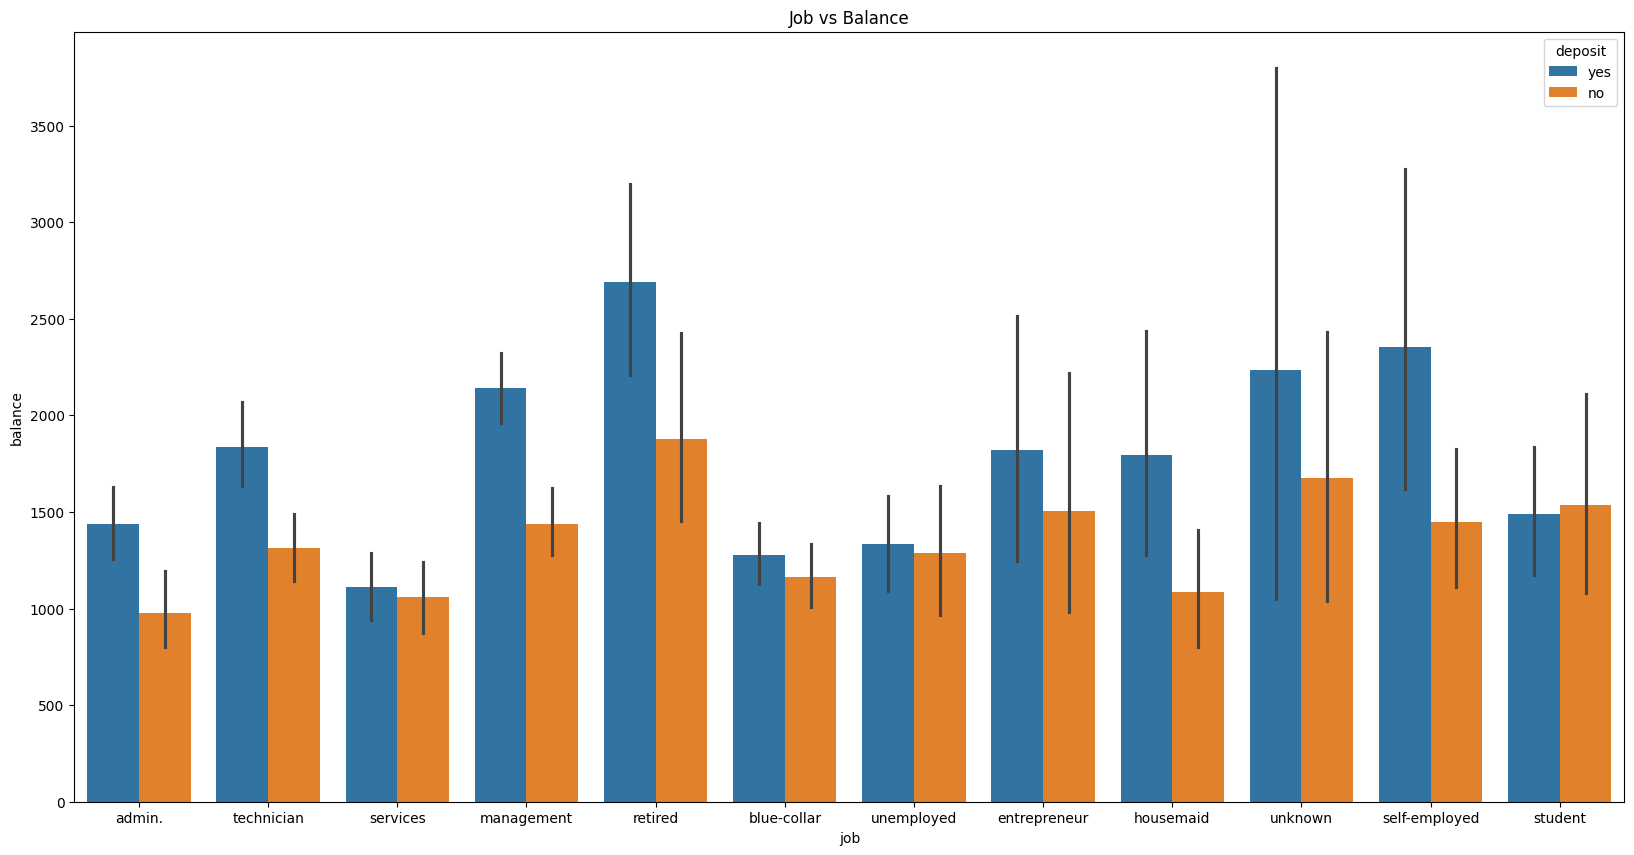

In [11]:
plt.figure(figsize = (20, 10))
sns.barplot(data = data, x = 'job', y = 'balance', hue = 'deposit')
plt.title('Job vs Balance')
plt.show()

We can see here, that retired customer has more balance than the rest

### Marital -> Marital status

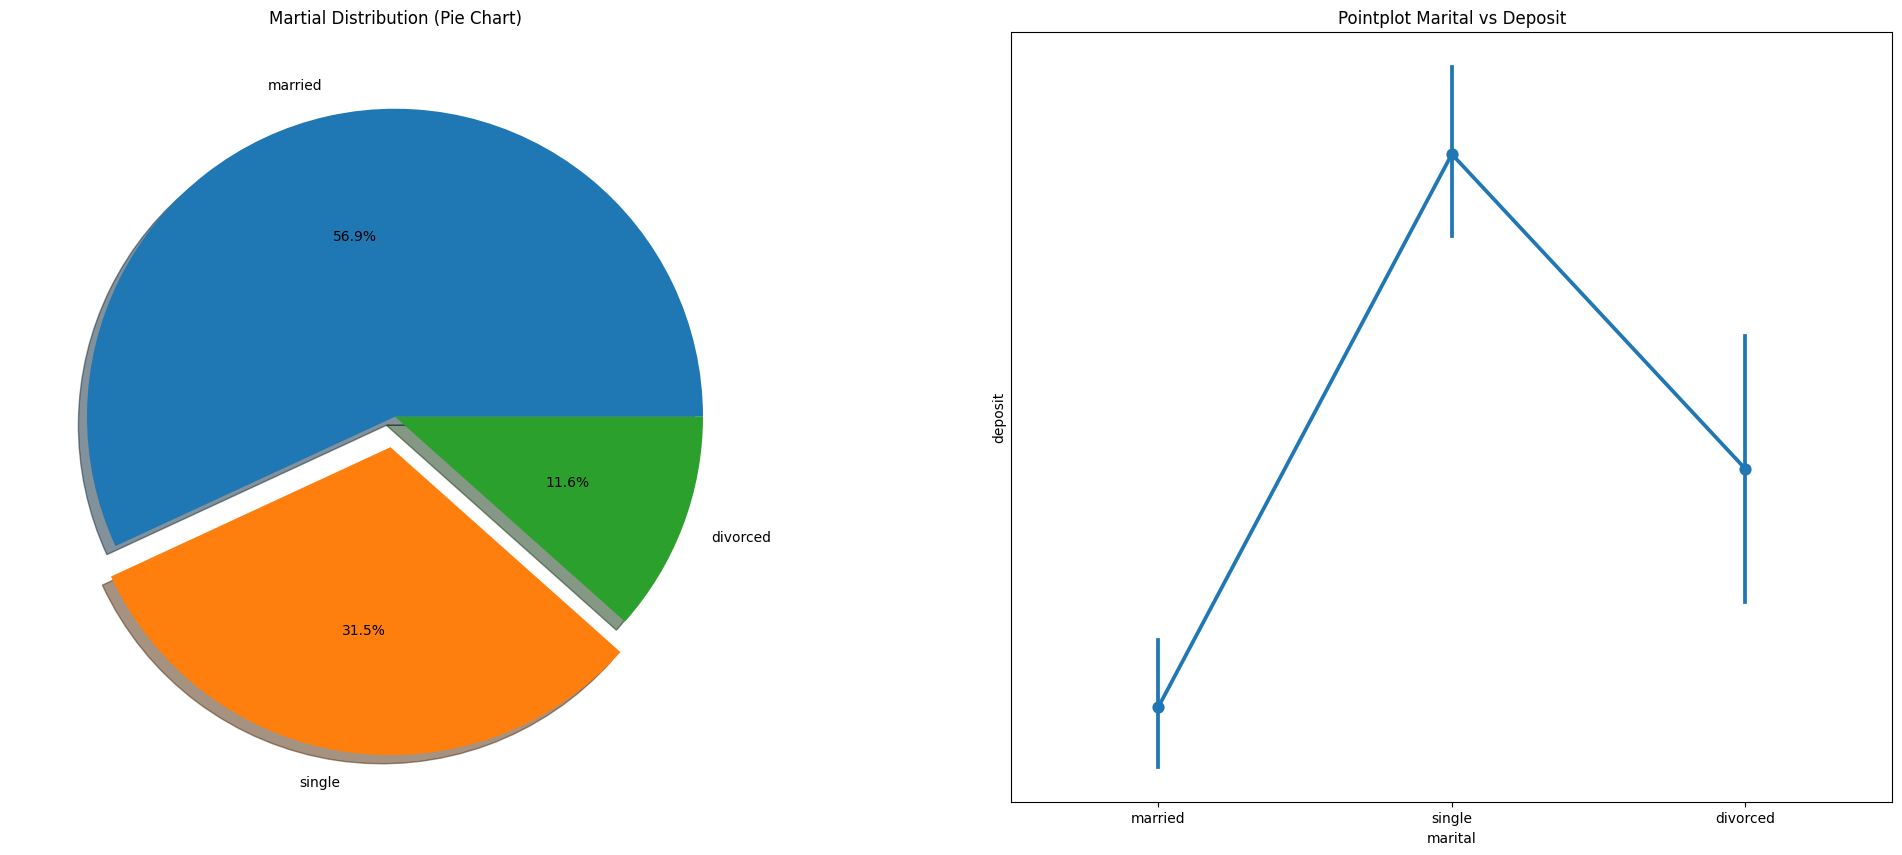

In [12]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))
data['marital'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0, 0.1, 0], shadow = True)
ax[0].set_ylabel('')
ax[0].set_title('Martial Distribution (Pie Chart)')
sns.pointplot(data = data, x = 'marital', y = 'deposit')
ax[1].set_title('Pointplot Marital vs Deposit')
plt.show()

The graph informs us, that the customer with single martial status a higher chance of depositing, followed by divorced and lastly married

### Education -> Education Status

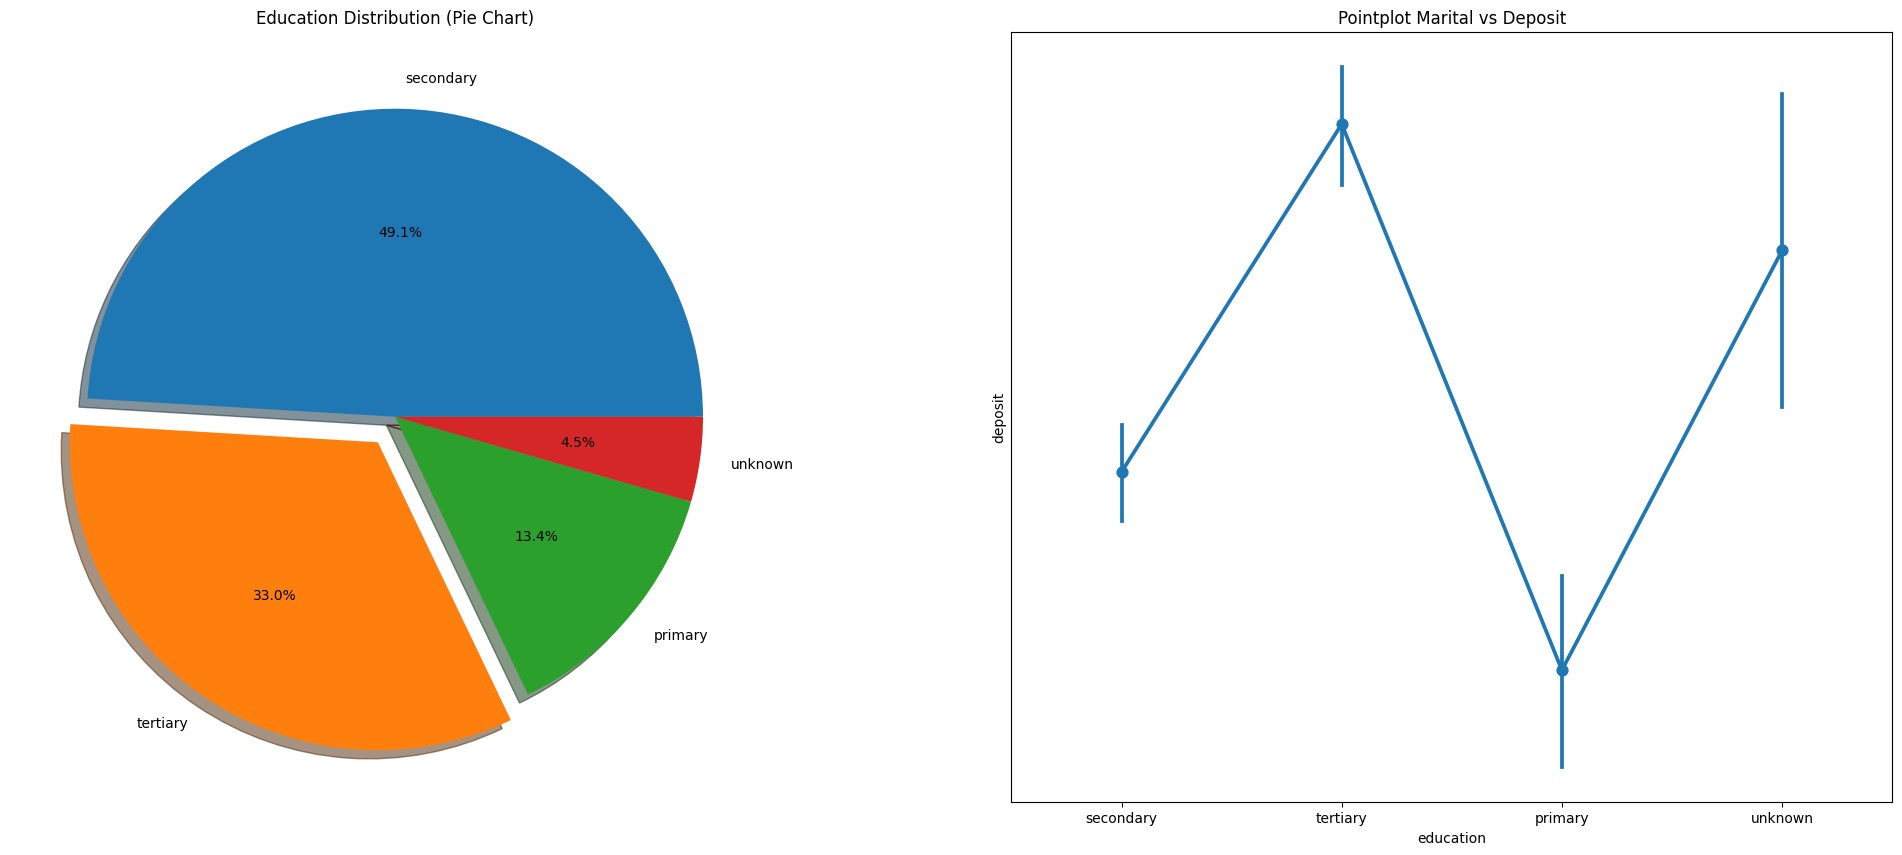

In [13]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))
data['education'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%',shadow = True, explode = [0, 0.1, 0, 0])
ax[0].set_ylabel('')
ax[0].set_title('Education Distribution (Pie Chart)')
sns.pointplot(data = data, x = 'education', y = 'deposit')
ax[1].set_title('Pointplot Marital vs Deposit')
plt.show()

As for education, the higher education status is, the higher chance person will do deposit. However, unknown category surprisngly took 2nd place.

### Balance -> Average yearly balance

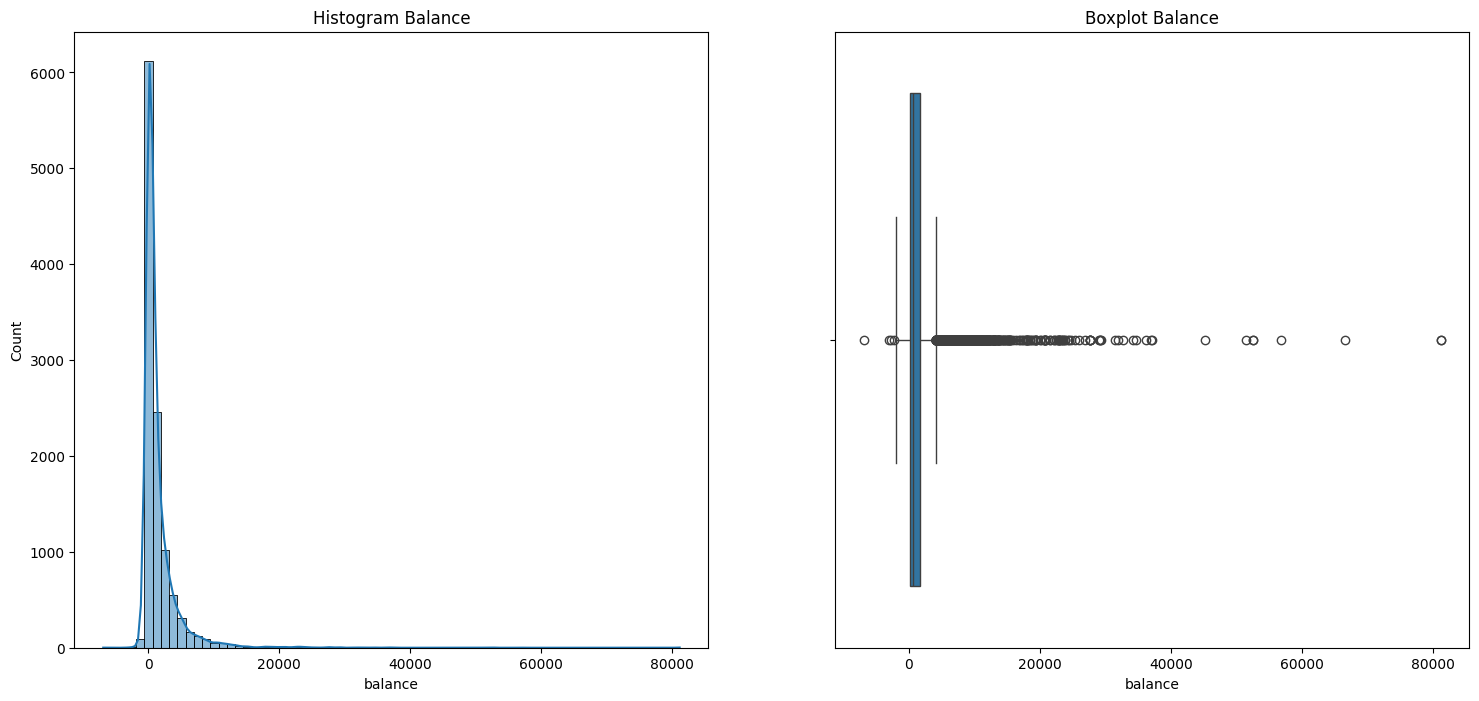

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data =data, x = 'balance', ax = ax[0], kde = True, bins = 70)
sns.boxplot(data = data, x = 'balance')
ax[0].set_title('Histogram Balance')
ax[1].set_title('Boxplot Balance')
plt.show()

Balance Histogram performed a right skewed distribution as there is still a lot of outlier in the data

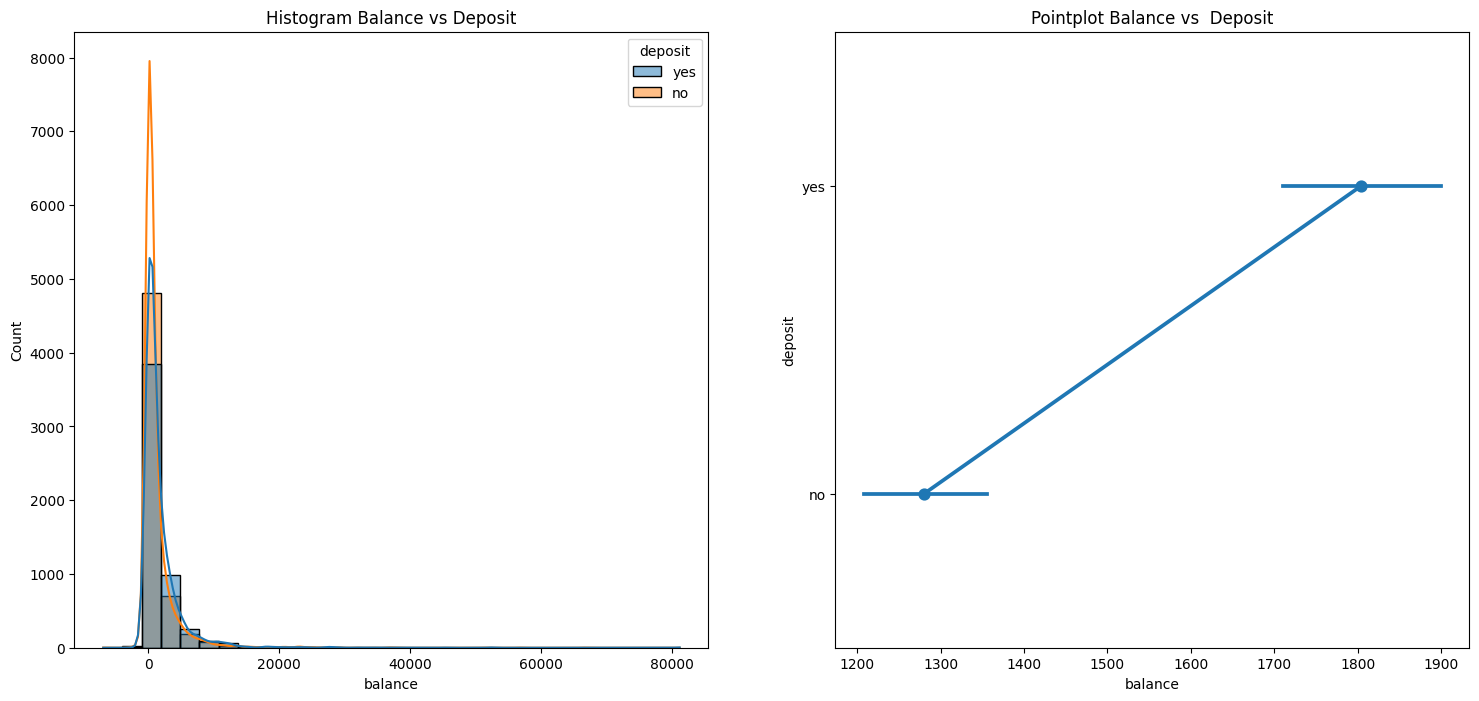

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'balance', ax = ax [0], bins = 30, kde = True, hue = 'deposit')
sns.pointplot(data = data, x = 'balance', y = 'deposit')
ax[0].set_title('Histogram Balance vs Deposit')
ax[1].set_title('Pointplot Balance vs  Deposit')
plt.show()

As for the balance itself, aroudn 10.000, more people decide to deposit as we can see on the right graph, the higher the balance the grater chance for that person to deposit

### Housing -> Housing Loan

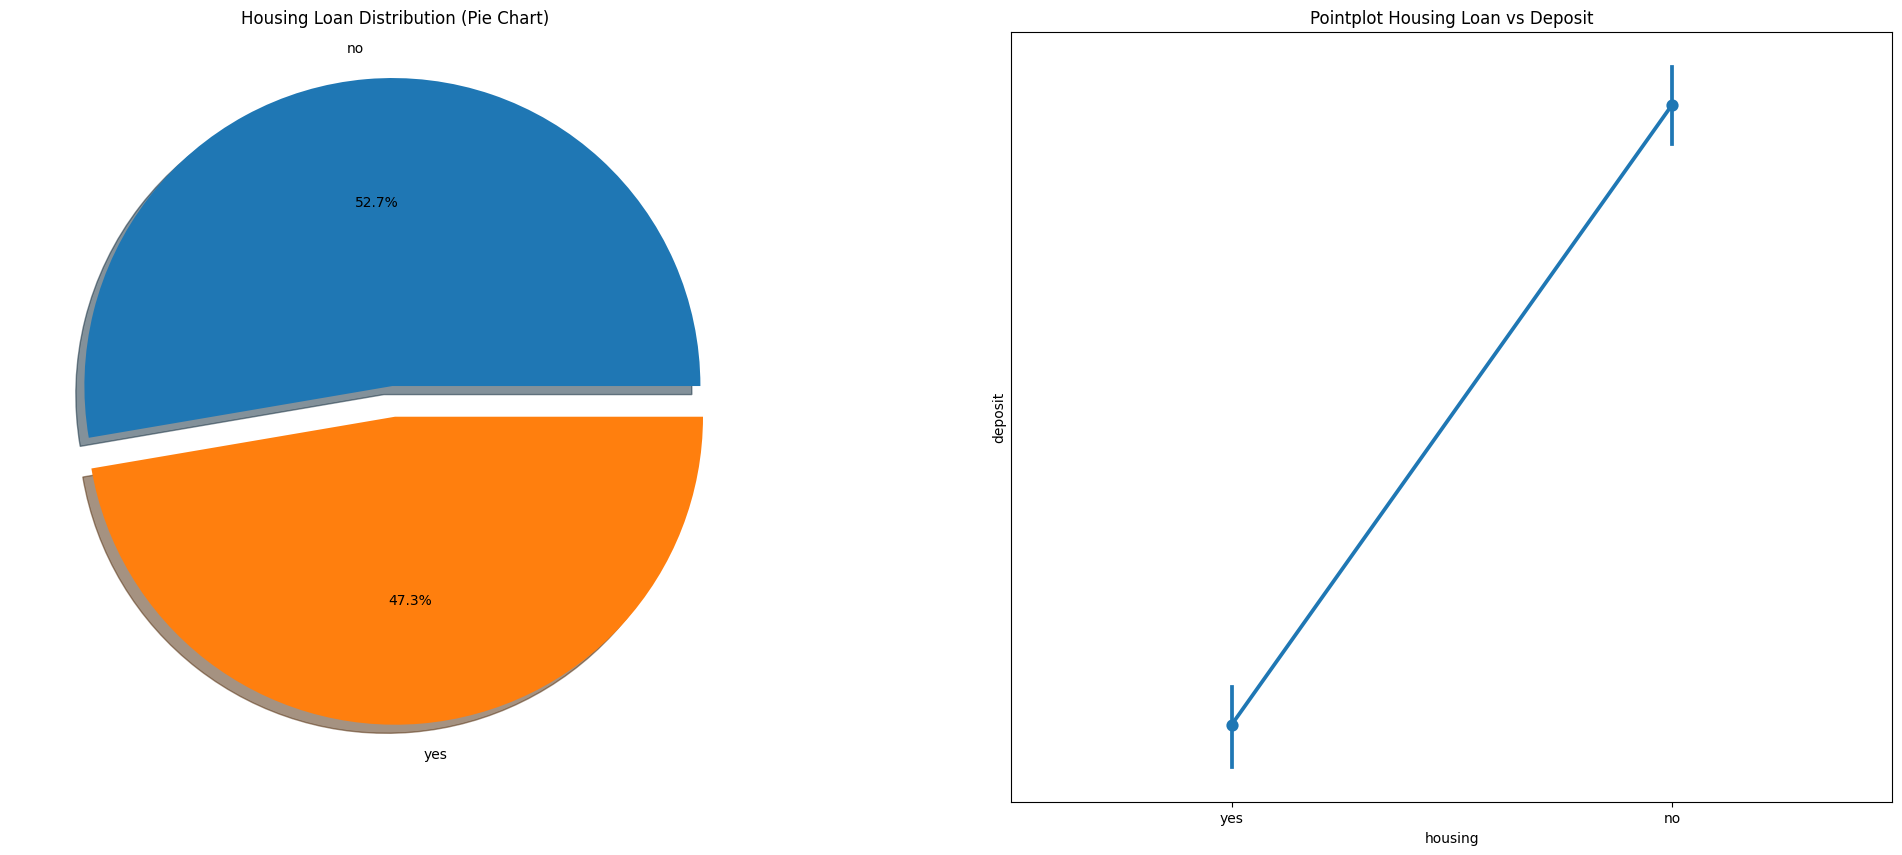

In [16]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))
data['housing'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0.1, 0], shadow = True)
ax[0].set_ylabel('')
ax[0].set_title('Housing Loan Distribution (Pie Chart)')
sns.pointplot(data = data, x = 'housing', y = 'deposit')
ax[1].set_title('Pointplot Housing Loan vs Deposit')
plt.show()

As for housing, the people that doesn't have housing loan has a grater chance to deposit rather the one ho has housing loan

### Loan -> Personal Loan

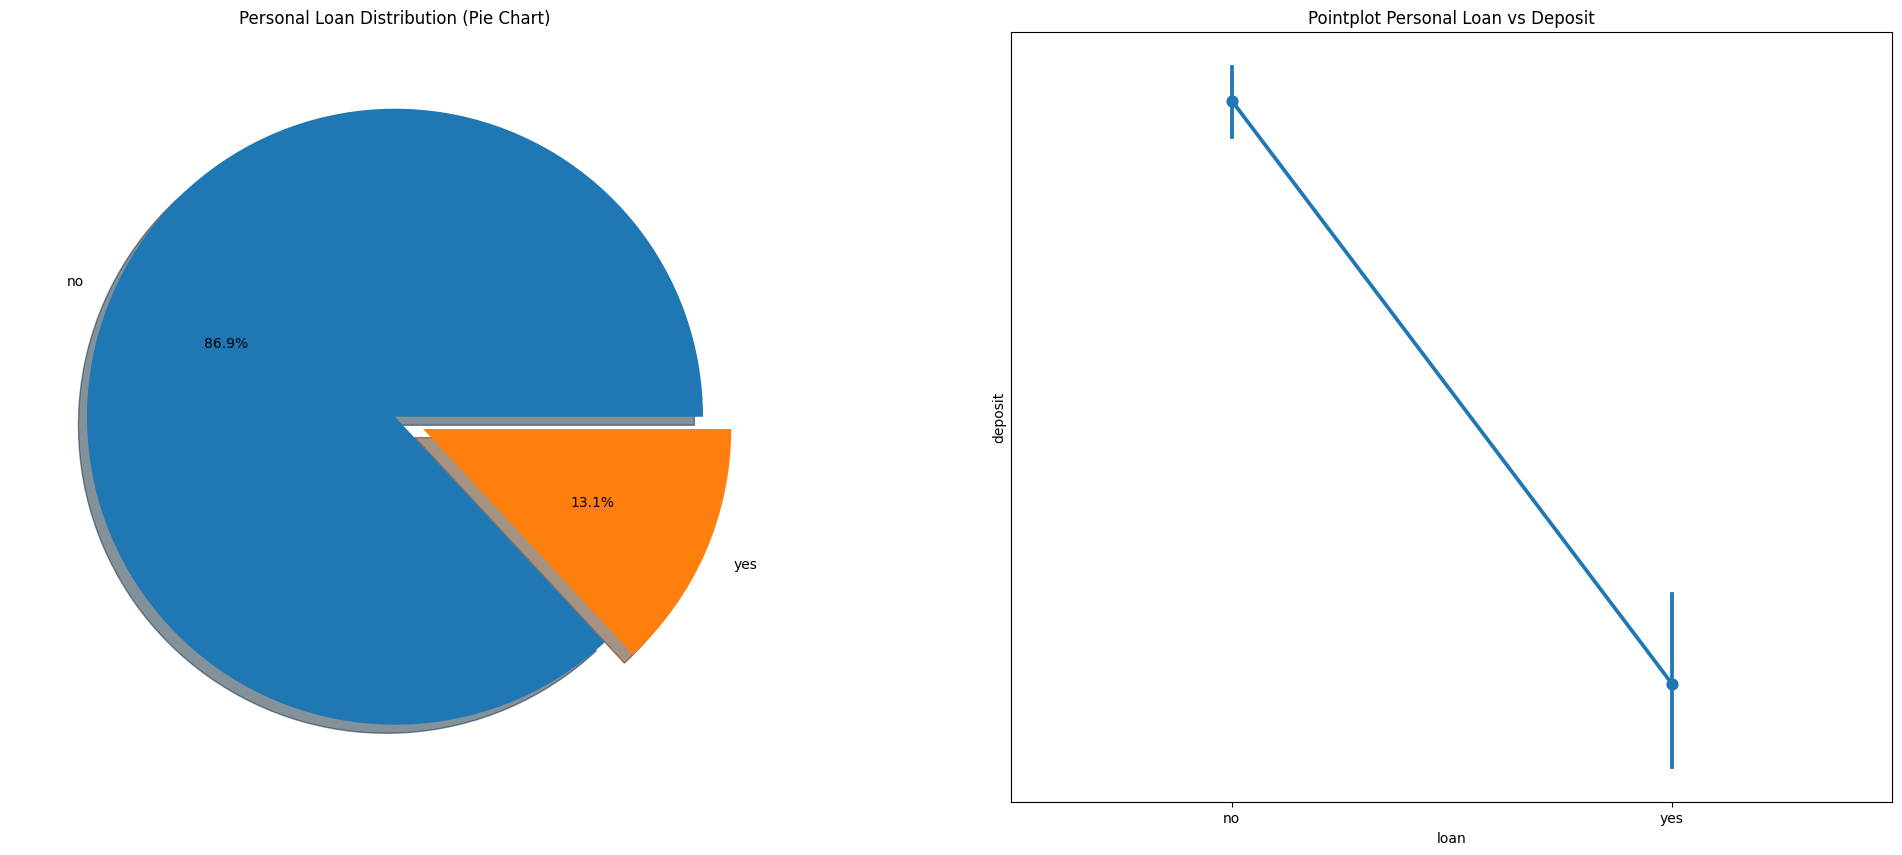

In [17]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))
data['loan'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0, 0.1], shadow = True)
ax[0].set_ylabel('')
ax[0].set_title('Personal Loan Distribution (Pie Chart)')
sns.pointplot(data = data, x = 'loan', y = 'deposit')
ax[1].set_title('Pointplot Personal Loan vs Deposit')
plt.show()

From this graph, we can conclude that loan has the same affect, either housing or personal as the one who does not have personal loan has greater chance to deposit (same as housing) rather the one who has.

### Contact

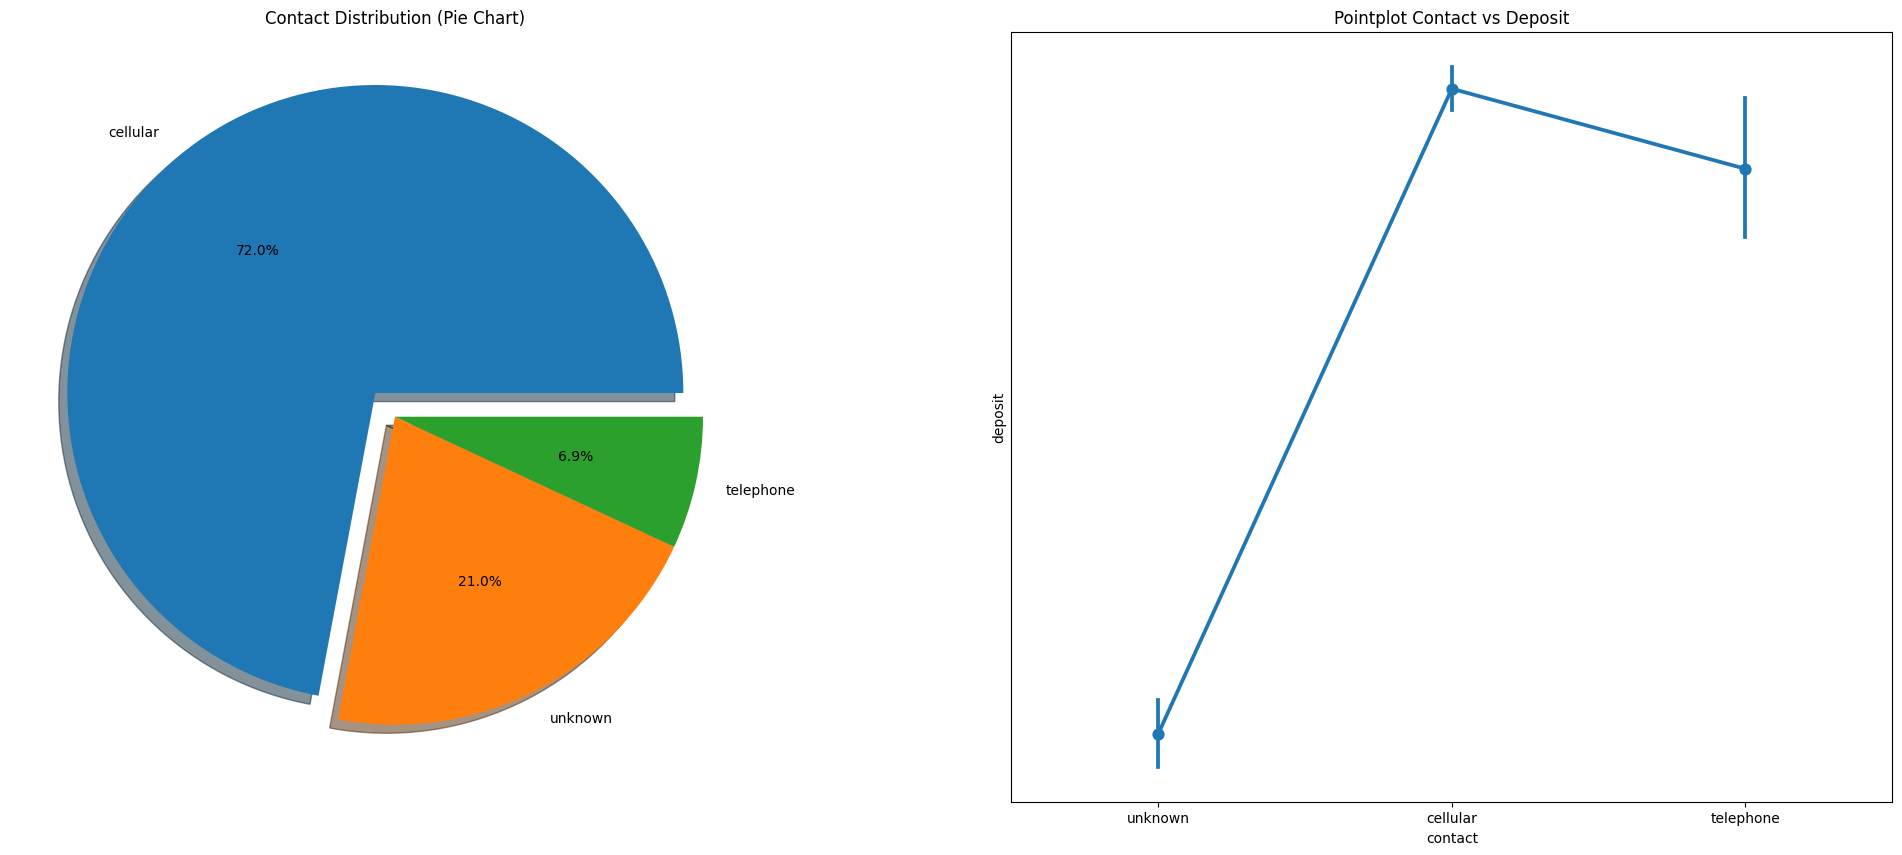

In [18]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))
data['contact'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0.1, 0, 0], shadow = True)
ax[0].set_ylabel('')
ax[0].set_title('Contact Distribution (Pie Chart)')
sns.pointplot(data = data, x = 'contact', y = 'deposit')
ax[1].set_title('Pointplot Contact vs Deposit')
plt.show()

For cellphone, customer who has cellular contact has a higher chance to deposit rather than telephone, as for 'unknown' the chance is very low than two other categories, the chance itself almost zero.

### Day -> last contact day of the week

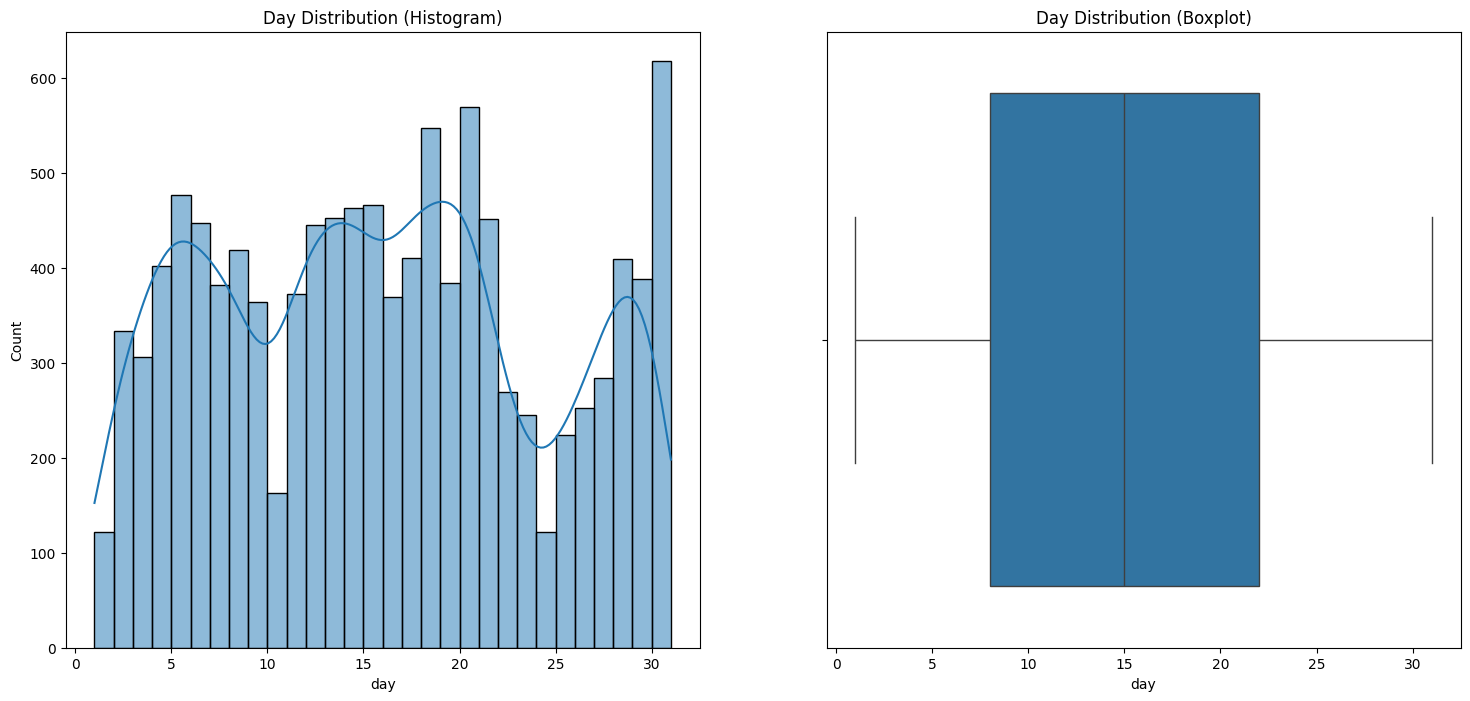

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'day', ax = ax [0], bins = 30, kde = True)
sns.boxplot(data = data, x = 'day')
ax[0].set_title('Day Distribution (Histogram)')
ax[1].set_title('Day Distribution (Boxplot)')
plt.show()

Day of week perform a unifrom distribution, where as we can see there is no outlier in the day of week

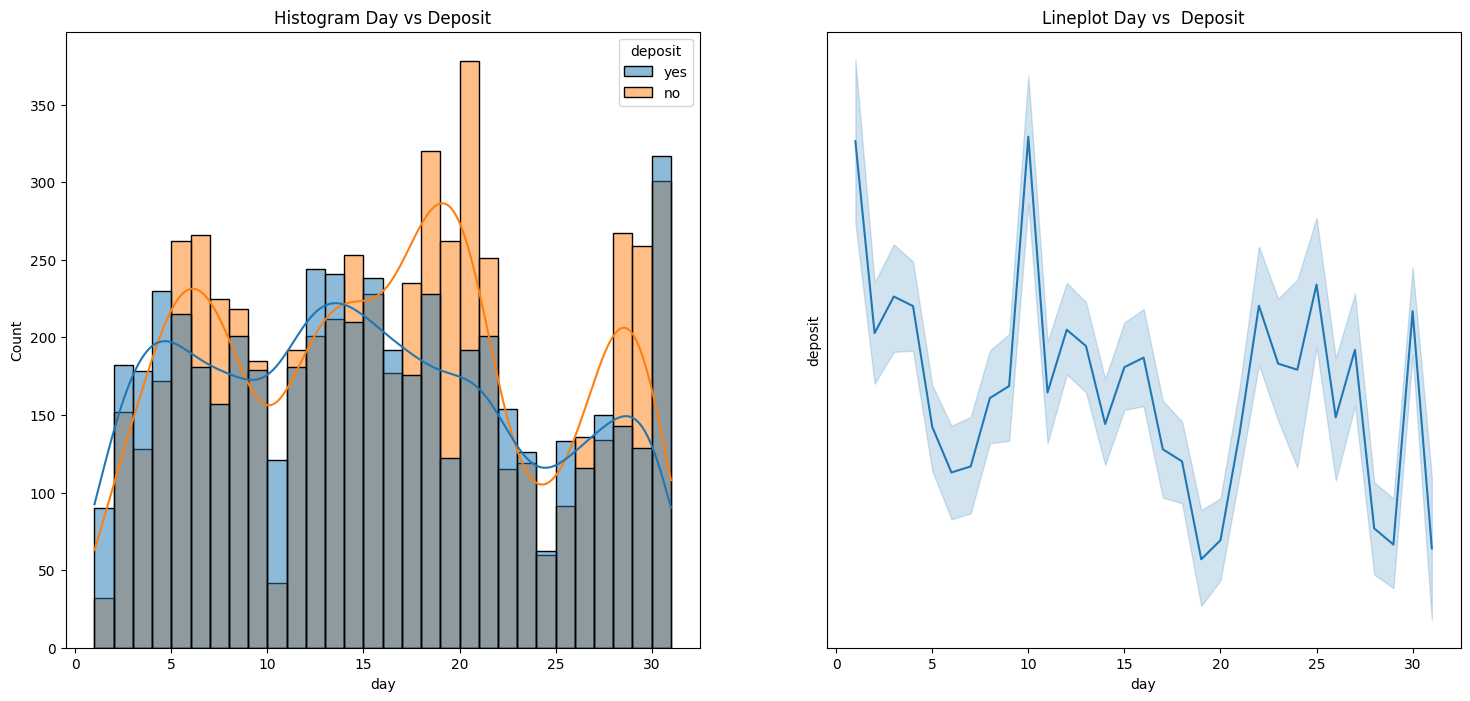

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'day', ax = ax [0], bins = 30, kde = True, hue = 'deposit')
sns.lineplot(data = data, x = 'day', y = 'deposit')
ax[0].set_title('Histogram Day vs Deposit')
ax[1].set_title('Lineplot Day vs  Deposit')
plt.show()

From the graph, there is no pattern we can take as the chance of each days are mostly random and day itself is continous.

### Month -> last contact month of year

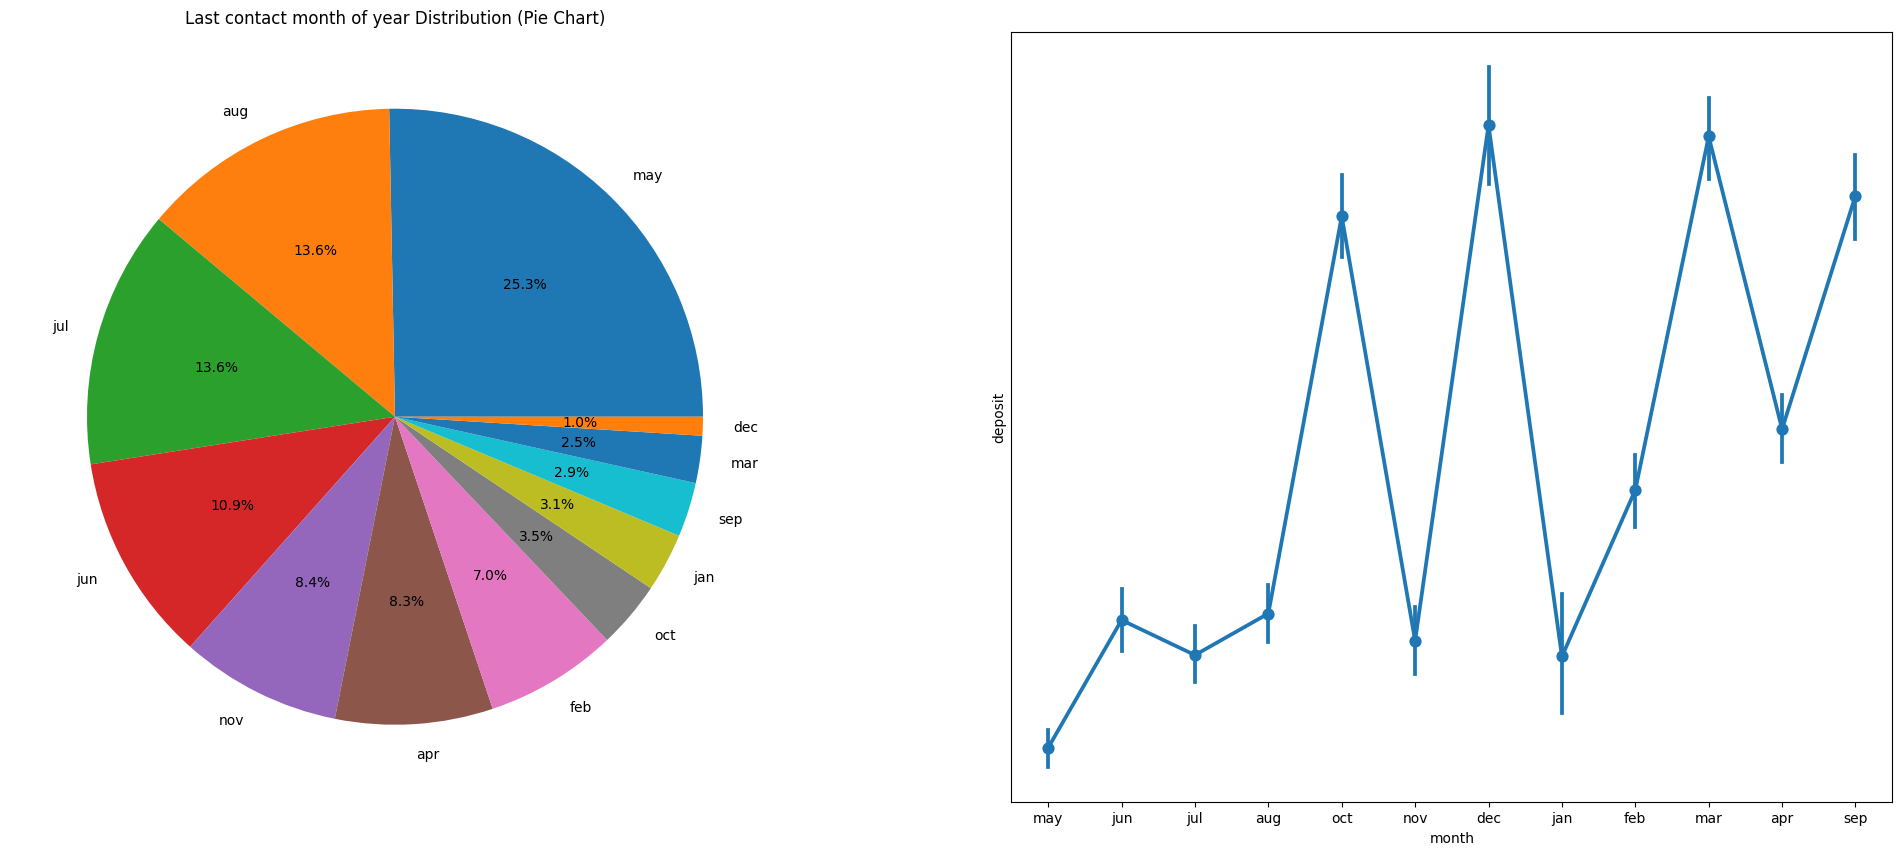

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (25, 10))
data['month'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%')
ax[0].set_ylabel('')
ax[0].set_title('Last contact month of year Distribution (Pie Chart)')
sns.pointplot(data = data, x = 'month', y = 'deposit')
plt.show()

Based on the graph, customer who last contacted on oct, dec, mar, and sep has greater chance to deposit rather than the rest

### Duration -> Last contract duration (in seconds)

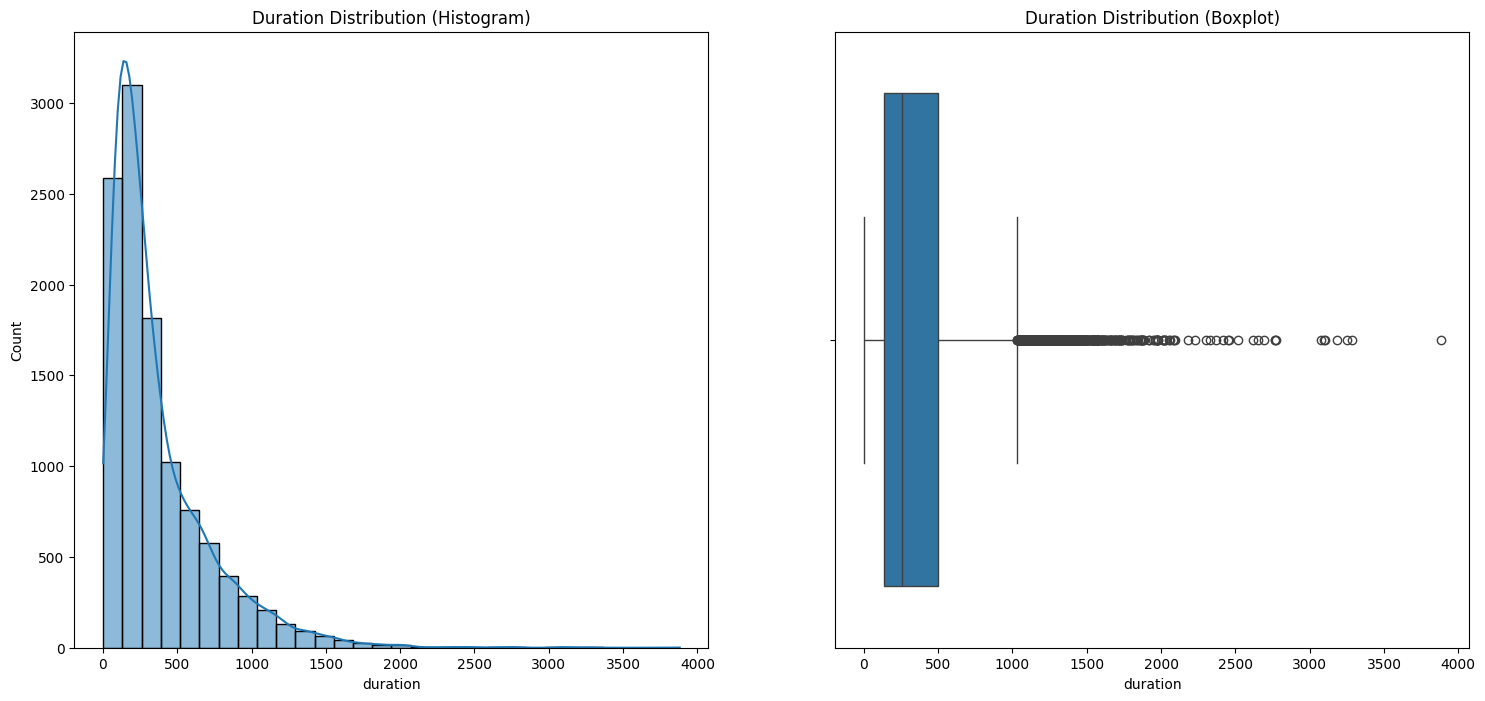

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'duration', ax = ax [0], bins = 30, kde = True)
sns.boxplot(data = data, x = 'duration')
ax[0].set_title('Duration Distribution (Histogram)')
ax[1].set_title('Duration Distribution (Boxplot)')
plt.show()

Duration also the same, where it perform skewed right distribution because there is a lot of outliers in the data

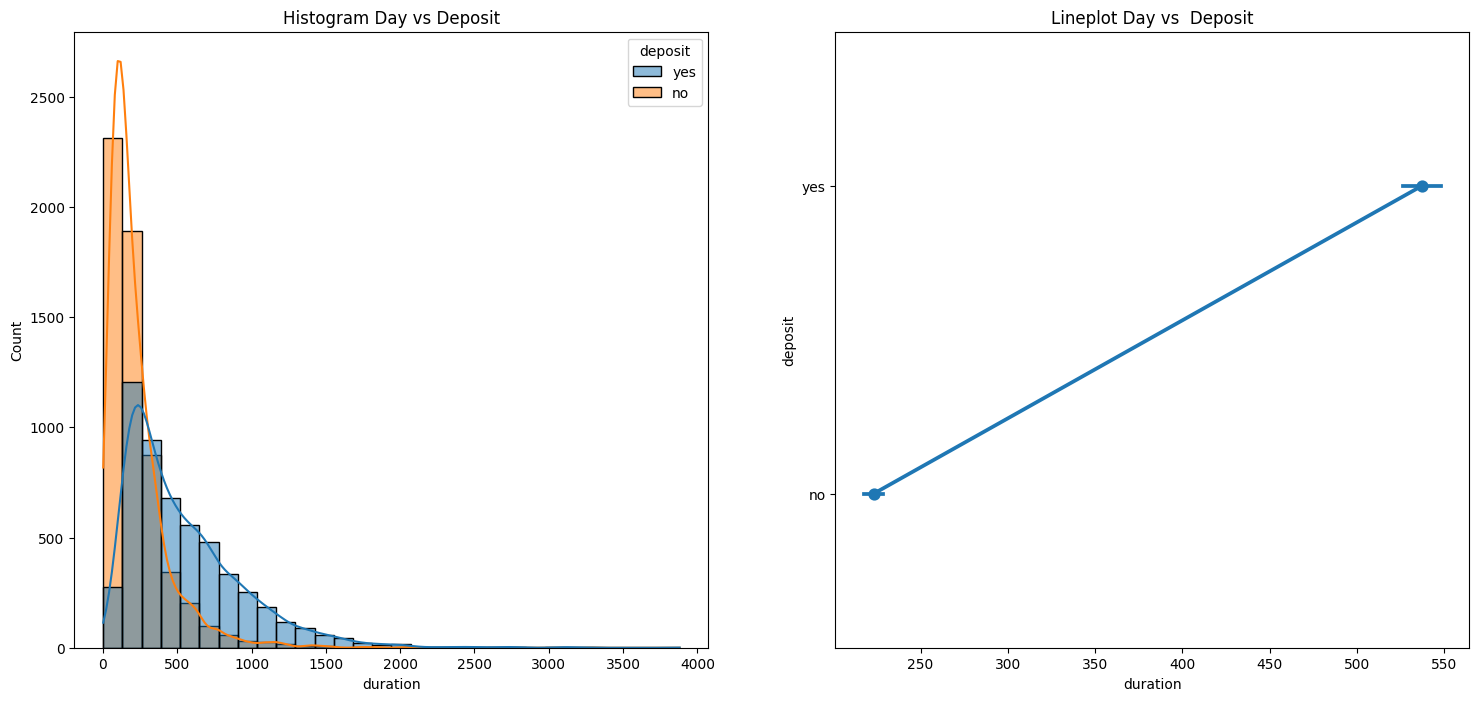

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'duration', ax = ax [0], bins = 30, kde = True, hue = 'deposit')
sns.pointplot(data = data, x = 'duration', y = 'deposit')
ax[0].set_title('Histogram Day vs Deposit')
ax[1].set_title('Lineplot Day vs  Deposit')
plt.show()

From the graph we can conclude that customer with last contact duration above around 400 seconds have higher chance to deposit

### Campaign & Previous
#### Campaign -> Number of contacts performed during this campaign
#### Previous -> Number of contacts performed before this campaign

#### Campaign

This feature describe how many times the client has been contacted during the marketing campaign and the previous campaign

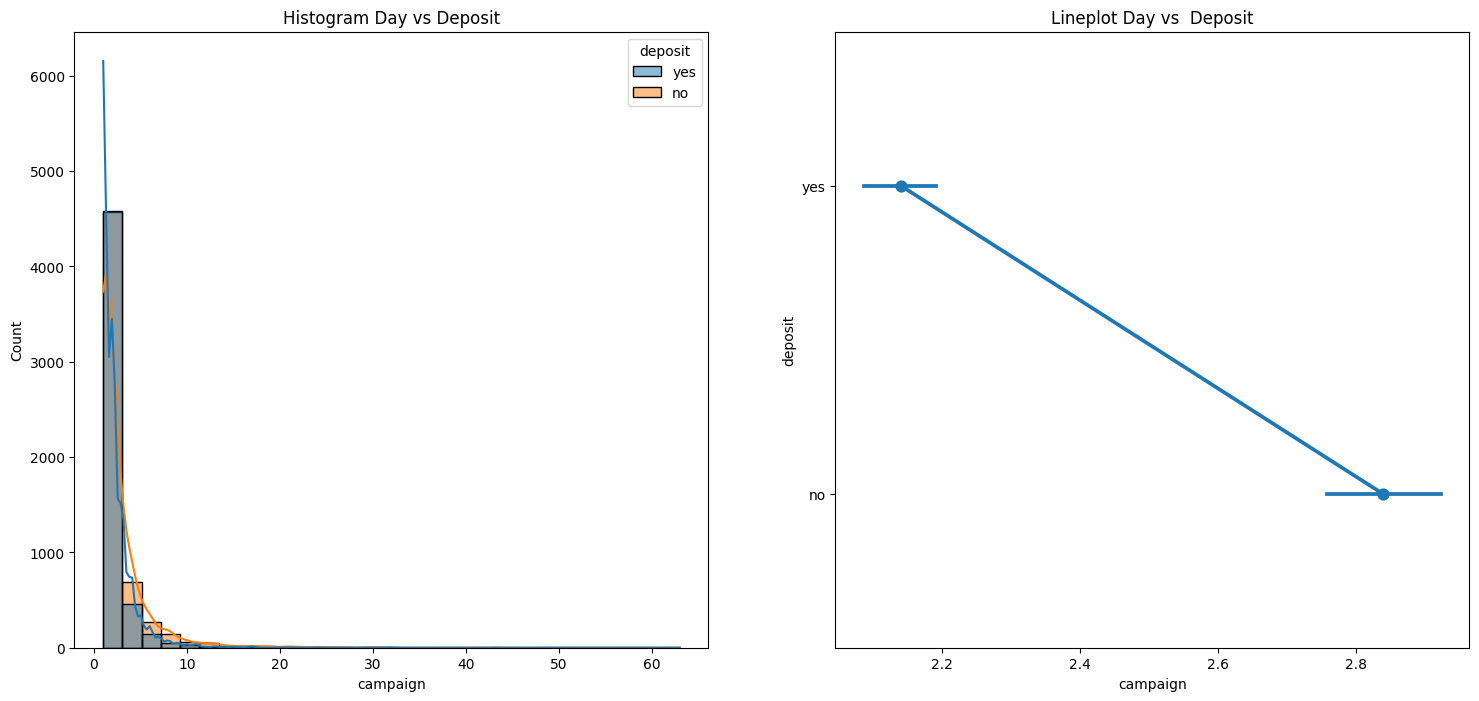

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'campaign', ax = ax [0], bins = 30, kde = True, hue = 'deposit')
sns.pointplot(data = data, x = 'campaign', y = 'deposit')
ax[0].set_title('Histogram Day vs Deposit')
ax[1].set_title('Lineplot Day vs  Deposit')
plt.show()

We can see that the fewer customer has been contacted, the greater chance for that customer to deposit.<br>
Bank shouldn't contact their customer more than 2 times as the chance is slightly getting lower

#### Previous

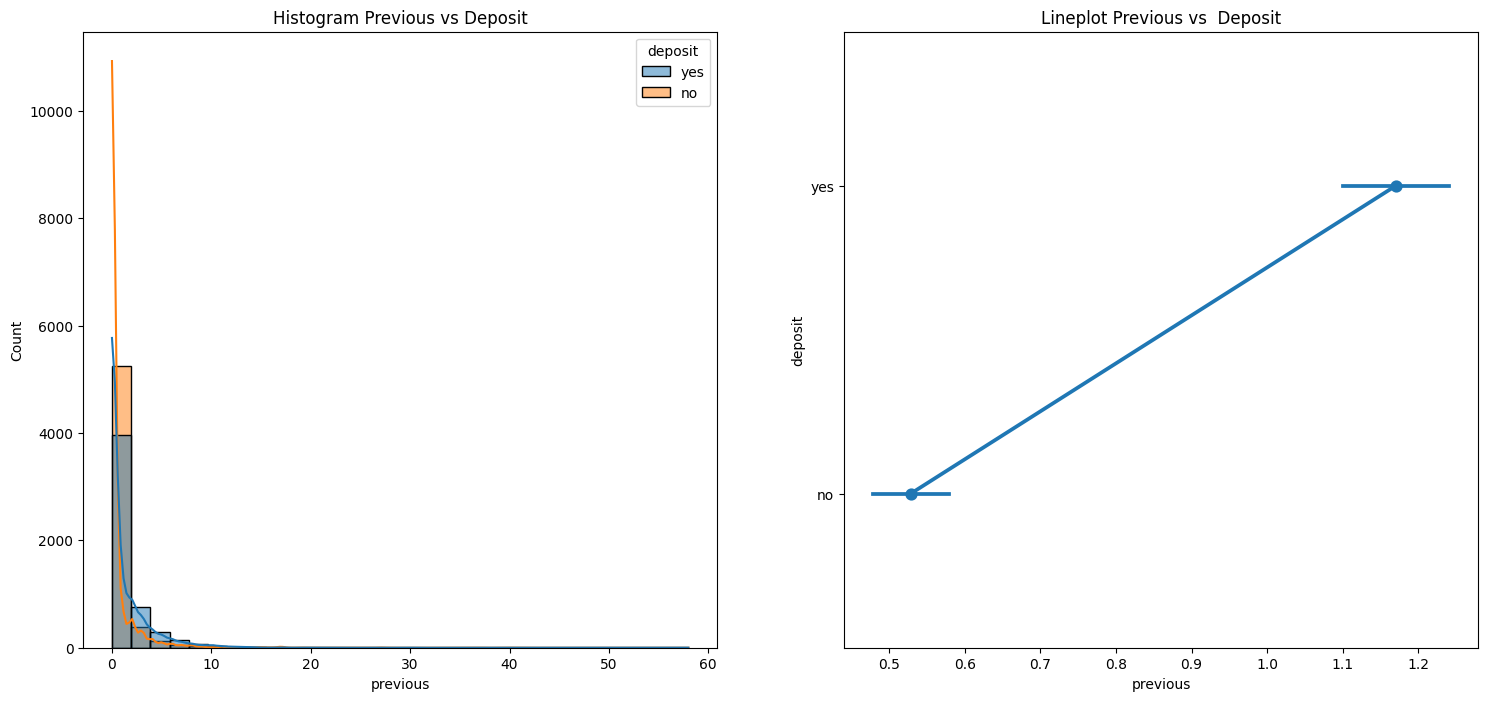

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'previous', ax = ax [0], bins = 30, kde = True, hue = 'deposit')
sns.pointplot(data = data, x = 'previous', y = 'deposit')
ax[0].set_title('Histogram Previous vs Deposit')
ax[1].set_title('Lineplot Previous vs  Deposit')
plt.show()

For the previous one, the graph informs us that customer who had previously been contacted for this has greater chance to deposit

### PDays - > Number of days passed after the client last contacted

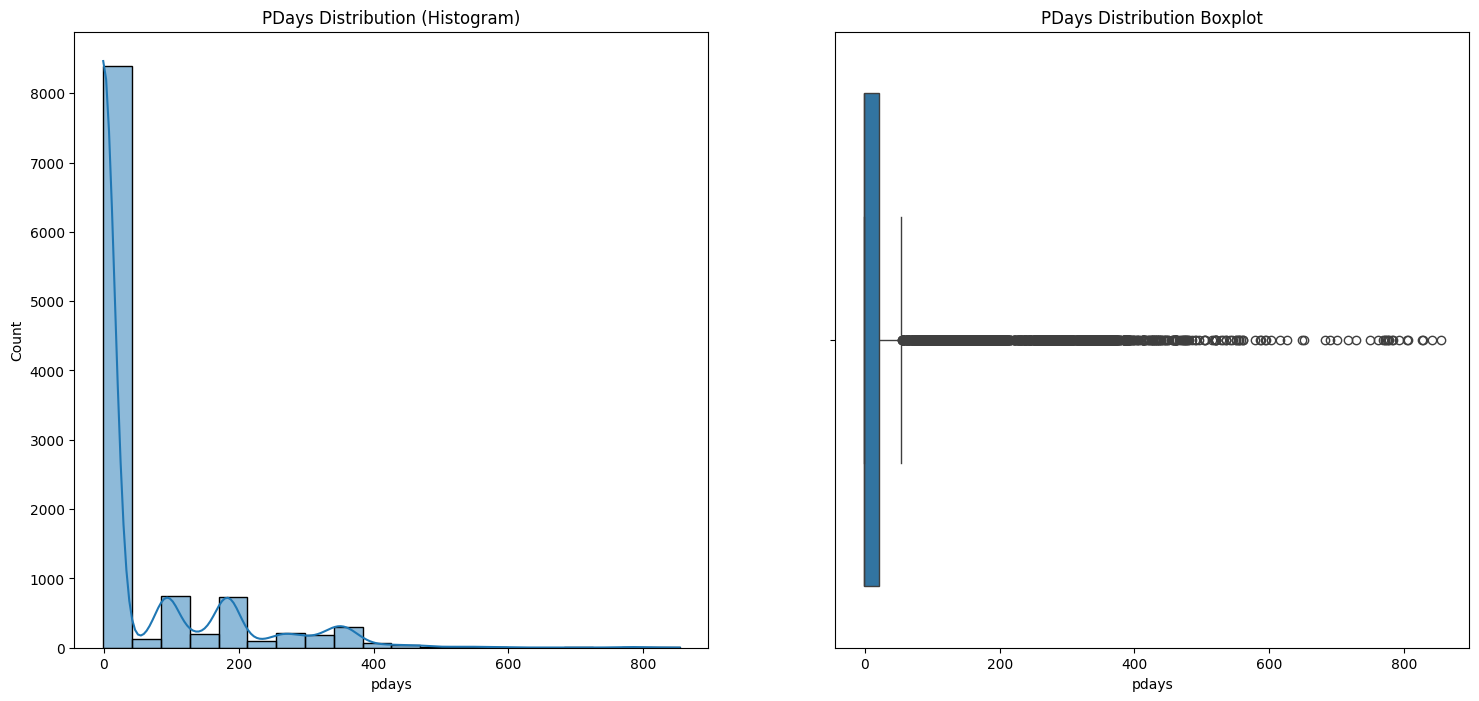

In [26]:
fig, ax = plt.subplots(1,2, figsize=(18, 8))
sns.histplot(data = data, x = 'pdays',  kde = True, bins = 20, ax = ax[0])
sns.boxplot(data = data, x = 'pdays')
ax[0].set_title('PDays Distribution (Histogram)')
ax[1].set_title('PDays Distribution Boxplot')
plt.show()

We cannot categorize this kind of distribution yet as there is so many outliers for this features

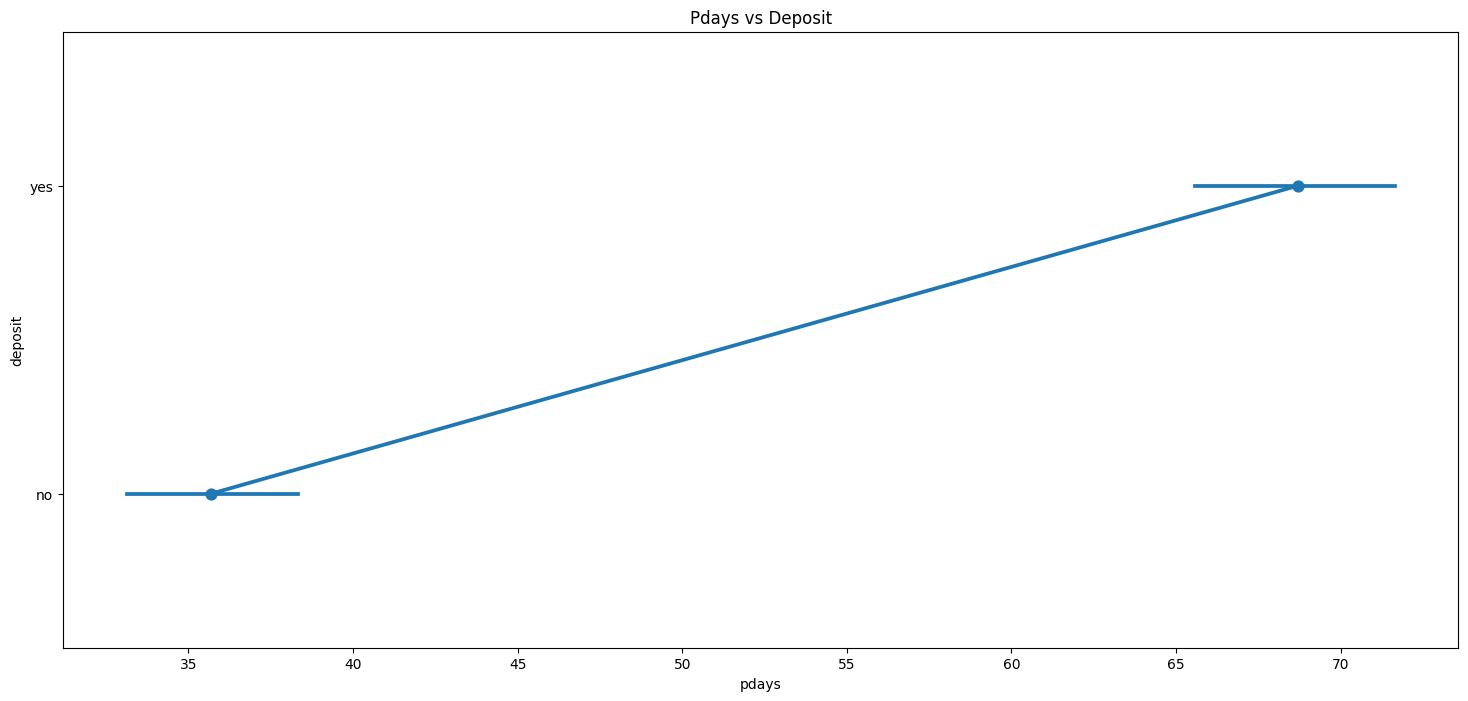

In [27]:
plt.figure(figsize = (18, 8))
sns.pointplot(data = data, x = 'pdays', y = 'deposit')
plt.title('Pdays vs Deposit')
plt.show()

We can see that The longer the day have passed, the greater chance the customer deposit

### Poutcome -> Outcome of the previous marketing campaign

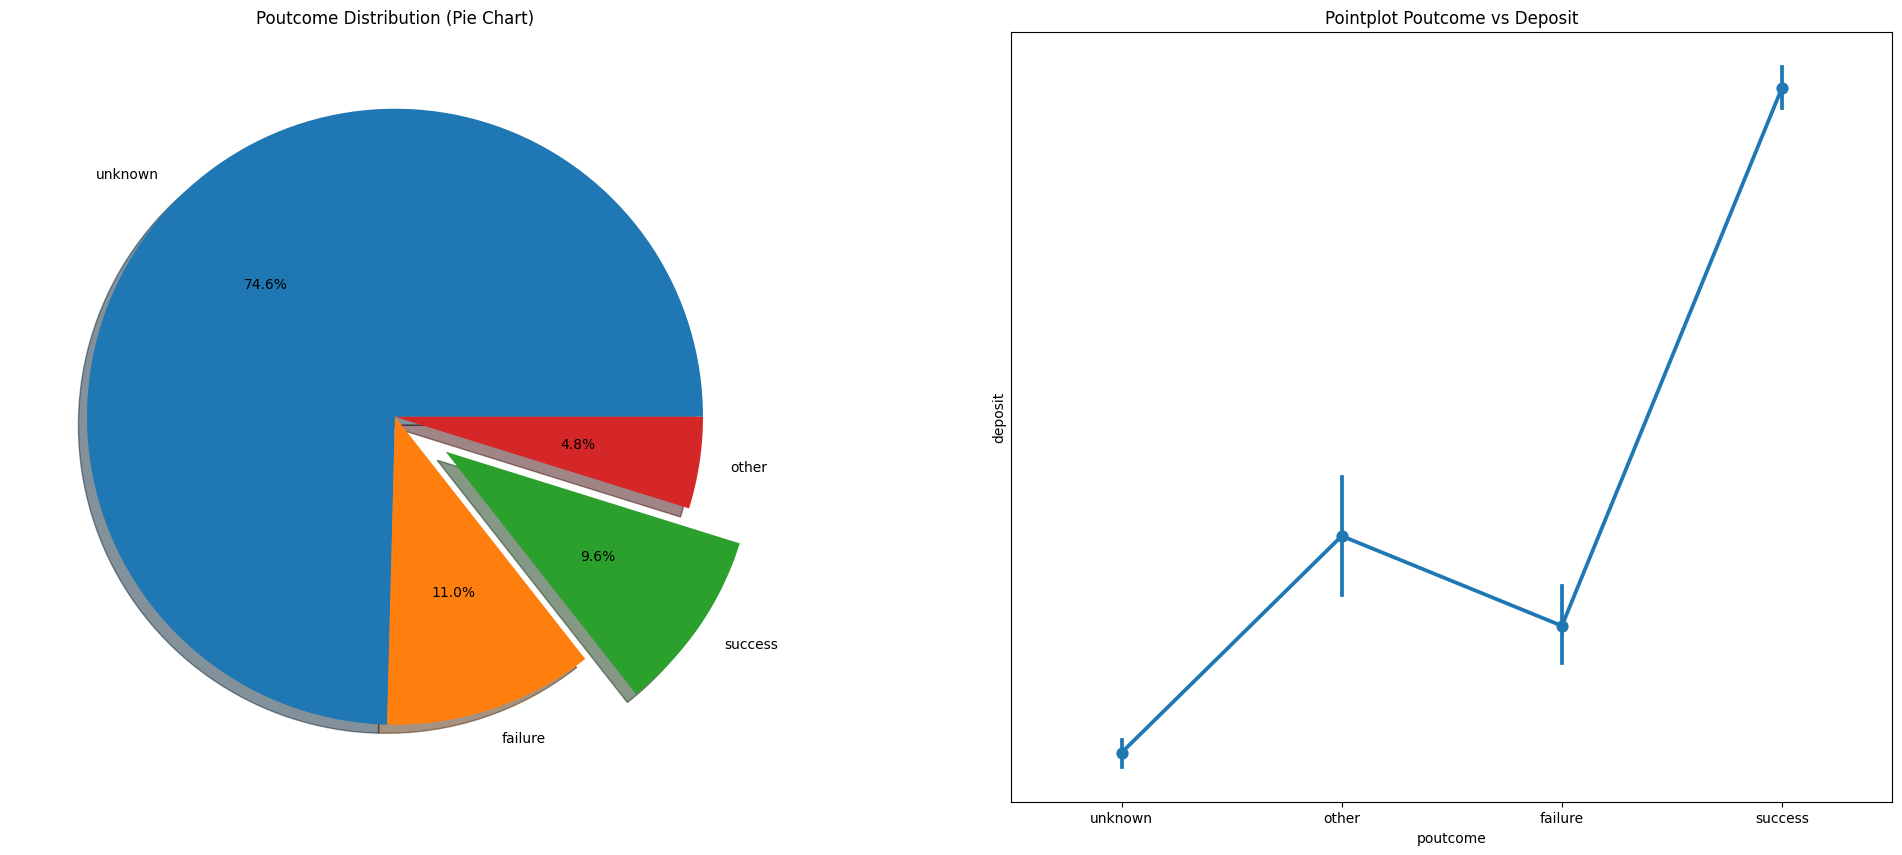

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (25, 10))
data['poutcome'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', shadow = True, explode = [0, 0, 0.2, 0])
ax[0].set_ylabel('')
ax[0].set_title('Poutcome Distribution (Pie Chart)')
ax[1].set_title('Pointplot Poutcome vs Deposit')
sns.pointplot(data = data, x = 'poutcome', y = 'deposit')
plt.show()

We can see that the previous customer who had succesfully been contacted has greater chance to deposit rather other reason, followed by failure ans lastly for unknwon reason

## Conclusion Pattern

Based on the graph above, we can take some important notes to determine how to make the campaign more succesful (drawing more attention to customer to deposit):<br>
a. The customer's account balance has a huge influence on the campaign's outcome. People with account balance above 1490$ are more likely to subscribe for term deposit, so future address those customers.<br>
b. The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.<br>
c. Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 2


## Correlation between Features

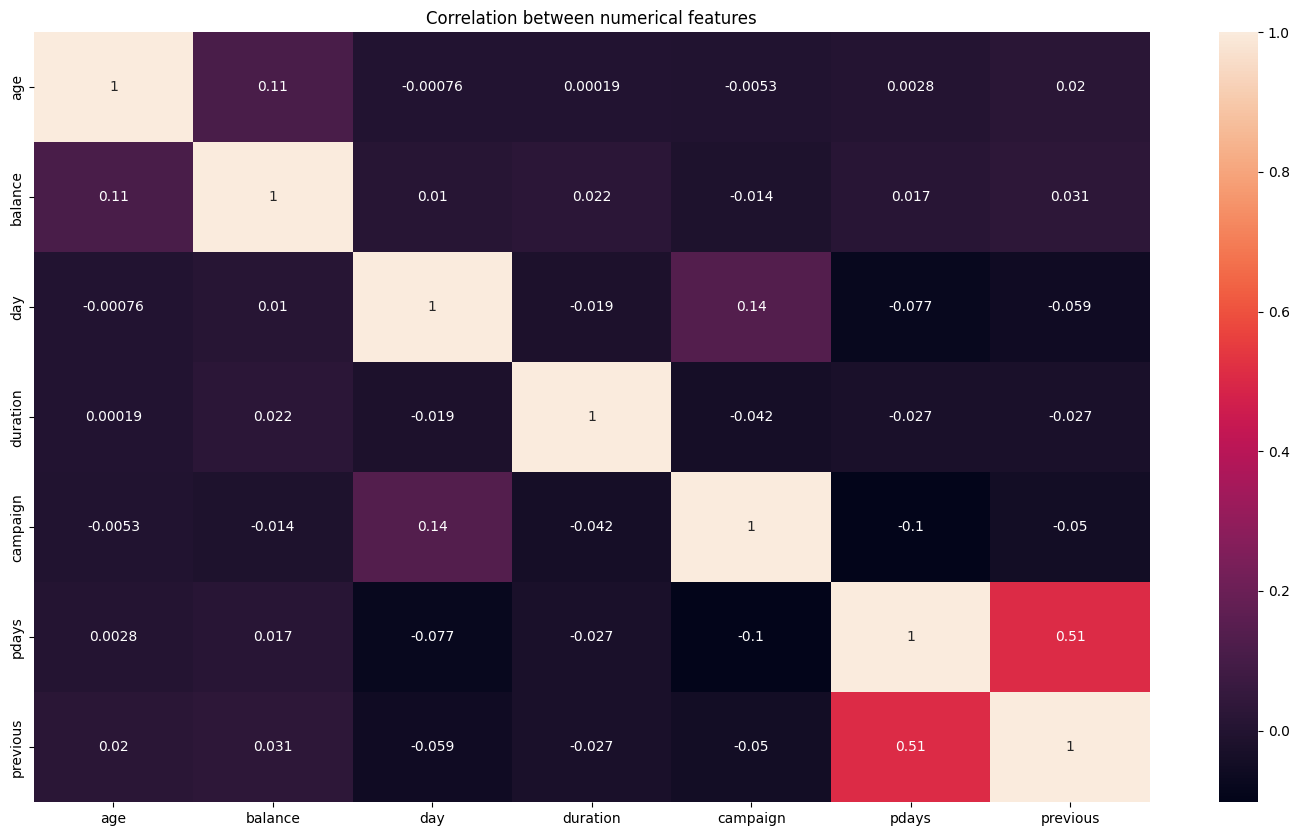

In [29]:
plt.figure(figsize = (18, 10))
numerical = data.select_dtypes(include=('number'))
sns.heatmap(data = numerical.corr(), annot = True)
plt.title('Correlation between numerical features')
plt.show()

We can see here that no Features exceed 0.7, in result we do not need to drop anything for the numerical features

# Data Preprocessing

## Handling Categorical Data

In [30]:
data = pd.get_dummies(data, drop_first=True)
data = data.astype('Int32')
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
11158,39,733,16,83,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting Feature and Target 

In [31]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Splitting Training and Test Dataset

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We need to split intro Training and test set first, in order to prevent information leakage

## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, [0, 1, 2, 3, 4, 6]] = sc.fit_transform(X_train.iloc[:, [0, 1, 2, 3, 4, 6]])
X_test.iloc[:, [0, 1, 2, 3, 4, 6]] = sc.fit_transform(X_test.iloc[:, [0, 1, 2, 3, 4, 6]])

C:\Users\user\AppData\Local\Temp\ipykernel_13856\3945864201.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.64941897  1.48737591 -0.69131213 ... -0.43992505 -0.85890352
  1.57117161]' has dtype incompatible with Int32, please explicitly cast to a compatible dtype first.
  X_train.iloc[:, [0, 1, 2, 3, 4, 6]] = sc.fit_transform(X_train.iloc[:, [0, 1, 2, 3, 4, 6]])
C:\Users\user\AppData\Local\Temp\ipykernel_13856\3945864201.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.44565283 -0.31617229 -0.41691446 ... -0.42196736 -0.46144314
  0.02300356]' has dtype incompatible with Int32, please explicitly cast to a compatible dtype first.
  X_train.iloc[:, [0, 1, 2, 3, 4, 6]] = sc.fit_transform(X_train.iloc[:, [0, 1, 2, 3, 4, 6]])
C:\Users\user\AppData\Local\Temp\ipykernel_13856\3945864201.py:3: FutureWarning: Setting an item of incompatib

# Shutdown warning

In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Modeling

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
def modeling(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print('Model Evaluation')
    print('Precision Score: ', precision_score(y_test, prediction))
    print('Recall Score: ', recall_score(y_test, prediction))
    print('F1 Score: ', f1_score(y_test, prediction))
    print('Accuracy Score: ', accuracy_score(y_test, prediction))
    cross = cross_val_score(model, X_train, y_train, cv = 10)
    print('Cross Validation (10): ', cross.mean())
    print('\nConfusion Matrix')
    cm = confusion_matrix(y_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

### Logistic Regression

Model Evaluation
Precision Score:  0.81610337972167
Recall Score:  0.7986381322957199
F1 Score:  0.8072763028515241
Accuracy Score:  0.8244514106583072
Cross Validation (10):  0.8284236136567926

Confusion Matrix


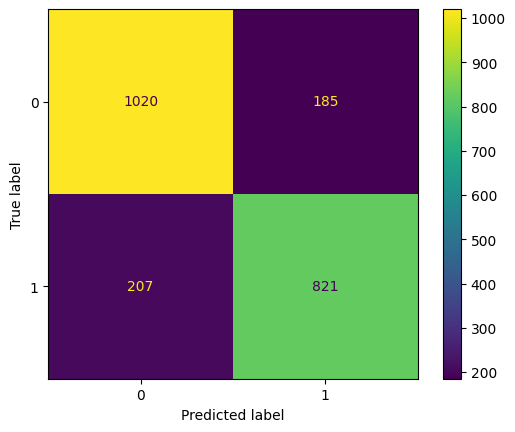

In [36]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression(max_iter=1000)
modeling(linear)

### Svm

#### Rbf Kernel

Model Evaluation
Precision Score:  0.7470355731225297
Recall Score:  0.36770428015564205
F1 Score:  0.49282920469361147
Accuracy Score:  0.651589789520824
Cross Validation (10):  0.6403874931580453

Confusion Matrix


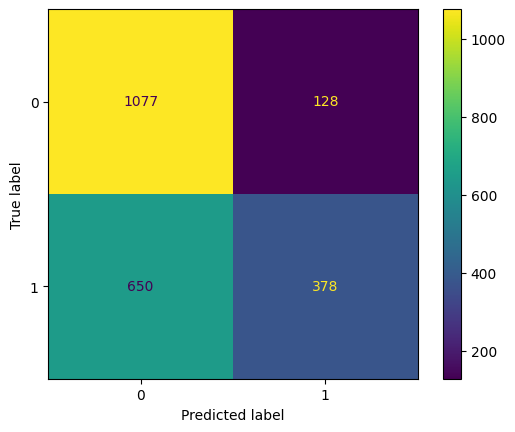

In [37]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
modeling(svm)

#### Linear Kernel

Model Evaluation
Precision Score:  0.8108632395732299
Recall Score:  0.8132295719844358
F1 Score:  0.8120446818844099
Accuracy Score:  0.8266905508284819
Cross Validation (10):  0.8301030938188904

Confusion Matrix


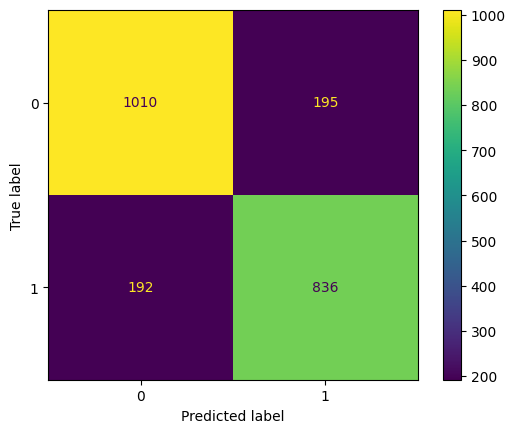

In [38]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
modeling(svm)